In [2]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

from math import ceil


# Purpose

This notebook is meant to analyze VA data based on master.csv. 

# Reading in Data

In [3]:
master = pd.read_csv("Data/Master/Master.csv")
df = master
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16,Percentage_Point_Wait_Over_30_Increase_Pending,Percentage_Point_Wait_Over_30_Increase_Complete,State,Name,qualitative_size,State_Full,Vet_Pop
0,42899,2.70,2.51,4.07,2.77,402,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,30.158368,19.063133,19.836100,1.48,-0.33,ME,"TOGUS, ME",average,Maine ...,125078.0
1,23709,2.16,3.92,3.95,0.79,405,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,17.919286,20.881650,18.335599,1.67,0.19,VT,"WHITE RIVER JUNCTION, VT",average,Vermont ...,47664.0
2,8105,5.17,1.12,10.53,4.41,518,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,10.692308,9.573141,9.741124,2.37,-0.44,MA,"BEDFORD, MA",average,Massachusetts,367531.0
3,85625,1.71,1.66,3.53,3.92,523,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,19.607948,11.326637,10.761329,2.72,1.66,MA,"VA BOSTON HCS, MA",large,Massachusetts,367531.0
4,19511,2.64,2.66,4.21,5.13,608,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,31.661270,25.679300,23.473225,1.45,-0.03,NH,"MANCHESTER, NH",small,New Hampshire ...,111389.0


In [4]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'for_dups', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'ID',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

In [5]:
# National
national_complete = pd.read_csv("Data/Wait_Time/Completed_Cleaned/National_Complete.csv")
national_pending = pd.read_csv("Data/Wait_Time/Pending_Clean/National_Pending.csv")


#used to strip time from Pending_Time
def get_date(test):
    test = test.strip('National: ')
    return parser.parse(test)

national_complete["date"] = national_complete["Complete_Time"].apply(get_date)
national_pending["date"] = national_pending["Pending_Time"].apply(get_date)
national_pending = national_pending.drop(20) #for some reason this was read in as 1989. Just dropping it


# Look at Pending Versus Complete

### 

count       140.000000
mean      11547.550000
std       16774.600779
min       -5744.000000
25%        2764.000000
50%        7157.500000
75%       14018.750000
max      110496.000000
Name: Pending_Increase, dtype: float64
R-squared: 0.884093860473


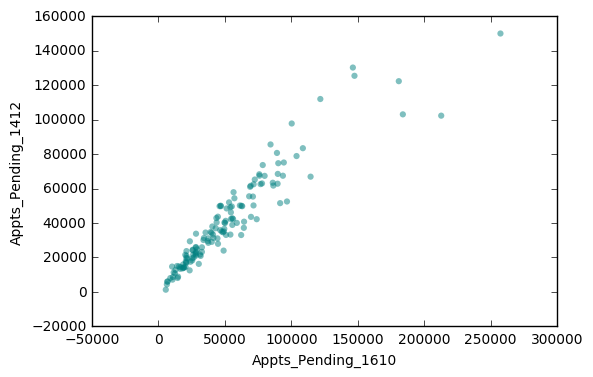

In [6]:
ax = df.plot(kind ='scatter',x='Appts_Pending_1610',y='Appts_Pending_1412',color='teal', edgecolor='none',alpha=.5)


print df["Pending_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Pending_1412"])
print "R-squared: "+ str(r_value**2)

count      140.000000
mean      2476.564286
std       3042.725816
min      -3430.000000
25%        372.750000
50%       1833.500000
75%       3922.750000
max      17594.000000
Name: Complete_Increase, dtype: float64
R-squared: 0.982578799834


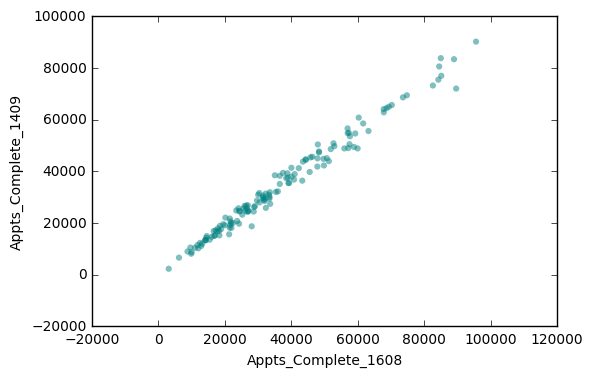

In [7]:
ax = df.plot(kind ='scatter',x='Appts_Complete_1608',y='Appts_Complete_1409',color='teal', edgecolor='none',alpha=.5)
print df["Complete_Increase"].dropna().describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Complete_1608"],df["Appts_Complete_1409"])
print "R-squared: "+ str(r_value**2)

### Thoughts
While there was an increase in both pending and completed appointments from 2014 to 2016, the pending saw a significantly bigger increase. 

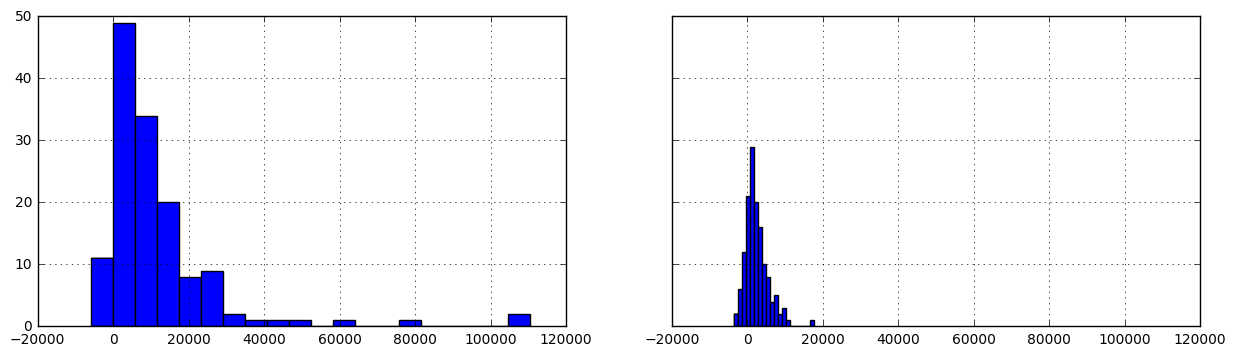

In [8]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,4))
df["Pending_Increase"].hist(bins=20, ax=ax1)
df["Complete_Increase"].hist(bins=20,ax=ax2)

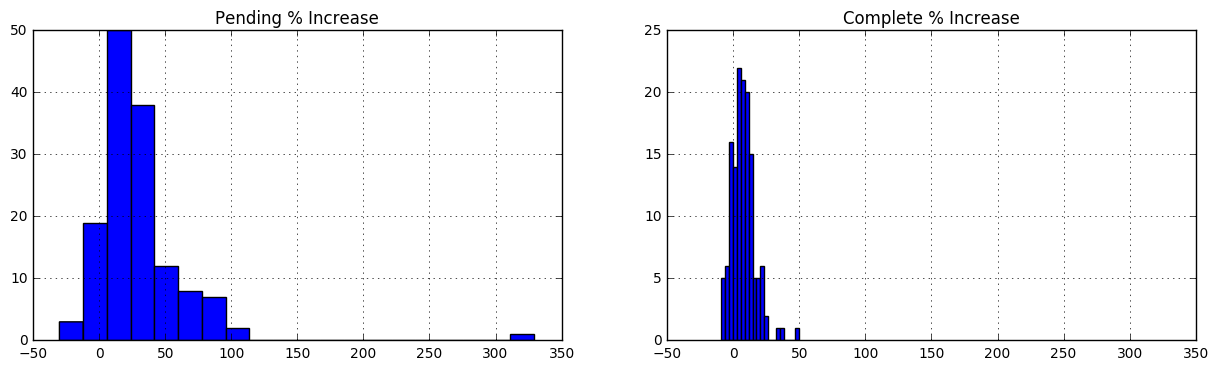

In [9]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,4))
ax1.set_title("Pending % Increase")
df["Pending_Increase_%"].hist(bins=20, ax=ax1)
ax2.set_title("Complete % Increase")
df["Complete_Increase_%"].hist(bins=20,ax=ax2)

R-squared 2014: 0.819824187817
R-squared 2016: 0.771112458157


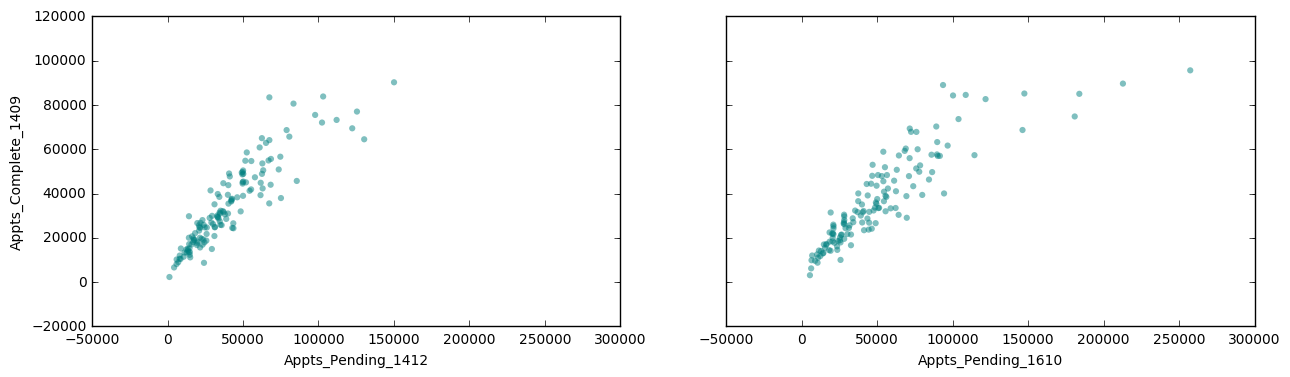

In [10]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,4))

df.plot(kind = 'scatter',x='Appts_Pending_1412', y='Appts_Complete_1409',ax=ax1,color='teal', edgecolor='none',alpha=.5)
df.plot(kind = 'scatter', x='Appts_Pending_1610', y='Appts_Complete_1608',ax=ax2,color='teal', edgecolor='none',alpha=.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1412"],df["Appts_Complete_1409"])
print "R-squared 2014: "+ str(r_value**2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Complete_1608"])
print "R-squared 2016: "+ str(r_value**2)



### Thoughts

It appears like several outliers are really dragging pending upward, but it's still a pretty large jump. 

## Appointments National

(0, 7000000)

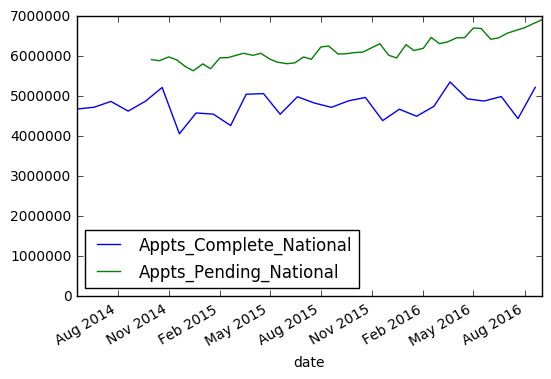

In [11]:
ax = national_complete[["Appts_Complete_National","date"]].set_index("date").plot()
national_pending[["Appts_Pending_National","date"]].set_index("date").plot(ax=ax)
ax.set_ylim(0,7000000)

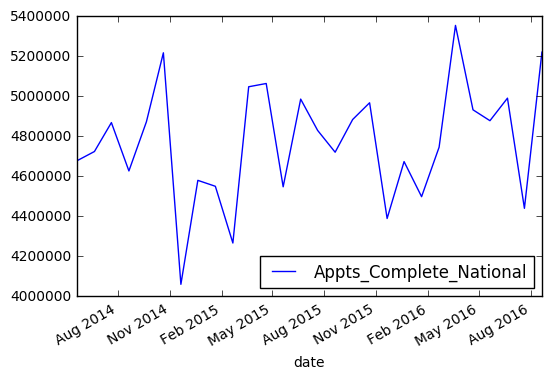

In [12]:
national_complete[["Appts_Complete_National","date"]].set_index("date").plot()

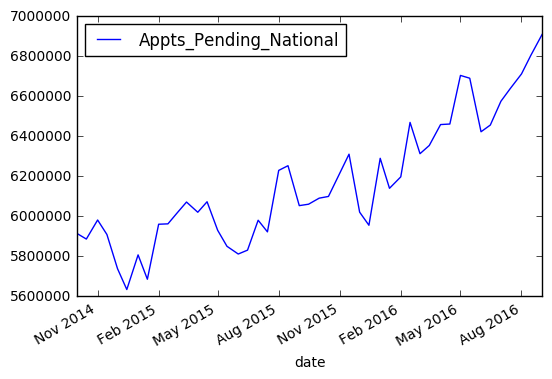

In [13]:
national_pending[["Appts_Pending_National","date"]].set_index("date").plot()

# Leadership

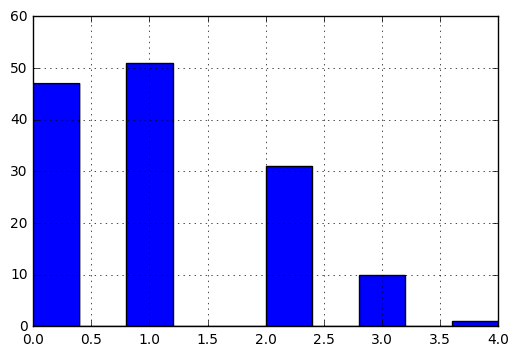

In [14]:
df["Missing_Leadership"].hist()

#### Thoughts
A majority of stations have at least one vacant or interim leadership position.

In [15]:
df["Missing_Leadership"].describe()

count    140.000000
mean       1.050000
std        0.954542
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Missing_Leadership, dtype: float64

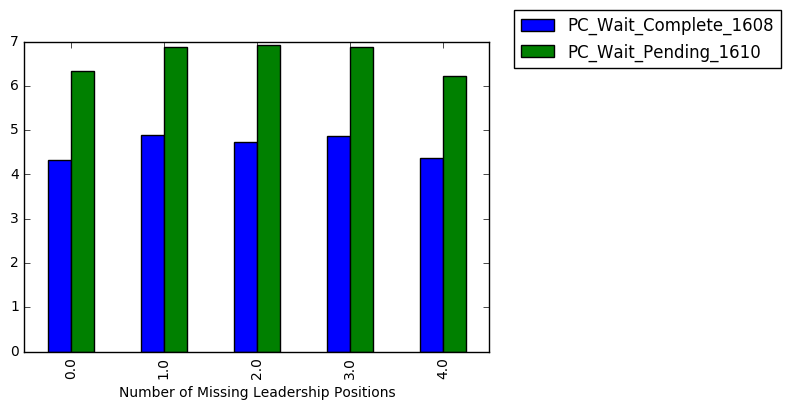

In [16]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1608','PC_Wait_Pending_1610'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

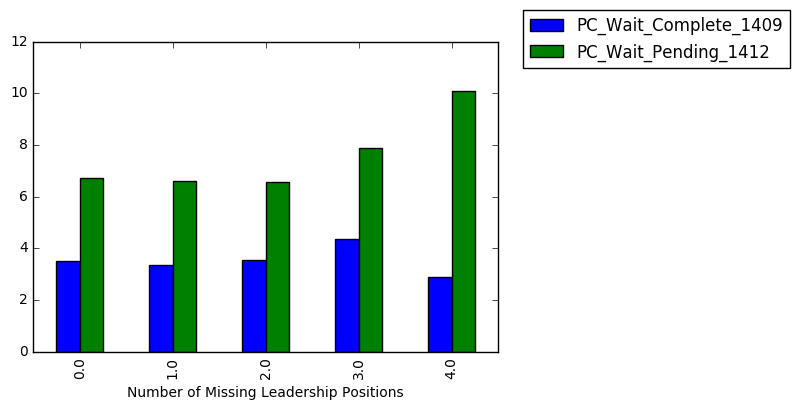

In [17]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1409','PC_Wait_Pending_1412'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
Wait times appear to be unaffected by missing leadership.

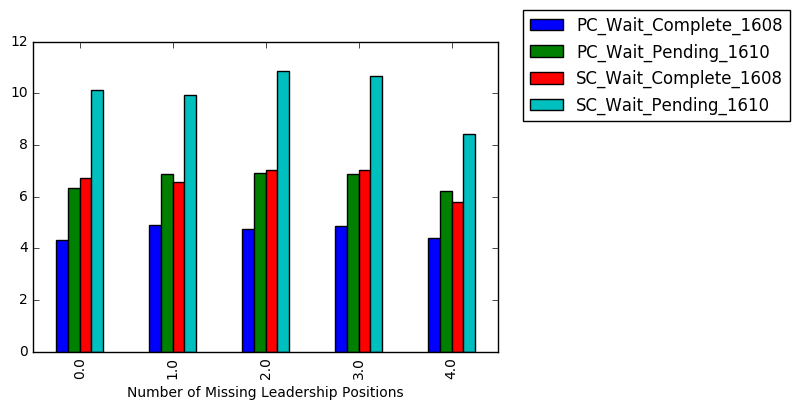

In [18]:
values = ['PC_Wait_Pending_1610','PC_Wait_Complete_1608','SC_Wait_Pending_1610','SC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

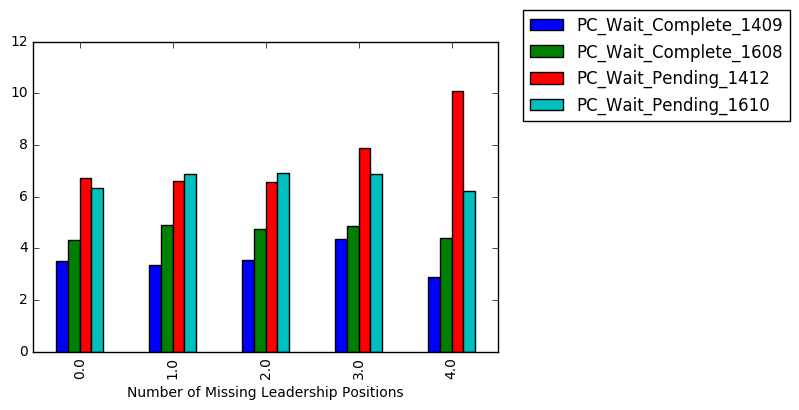

In [19]:
values = ['PC_Wait_Pending_1412','PC_Wait_Complete_1409','PC_Wait_Pending_1610','PC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

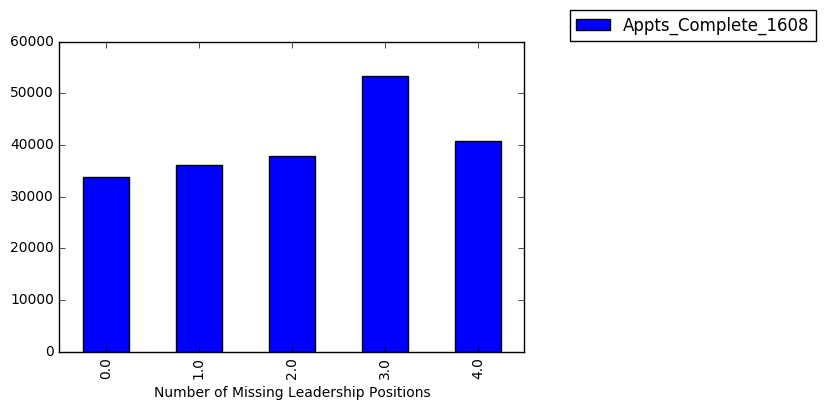

In [20]:
values = ['Appts_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

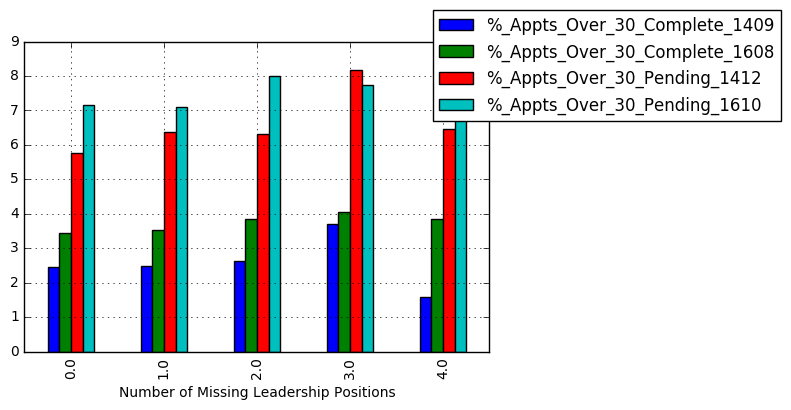

In [21]:
values = ["%_Appts_Over_30_Complete_1409","%_Appts_Over_30_Complete_1608",
          "%_Appts_Over_30_Pending_1412","%_Appts_Over_30_Pending_1610"]


pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

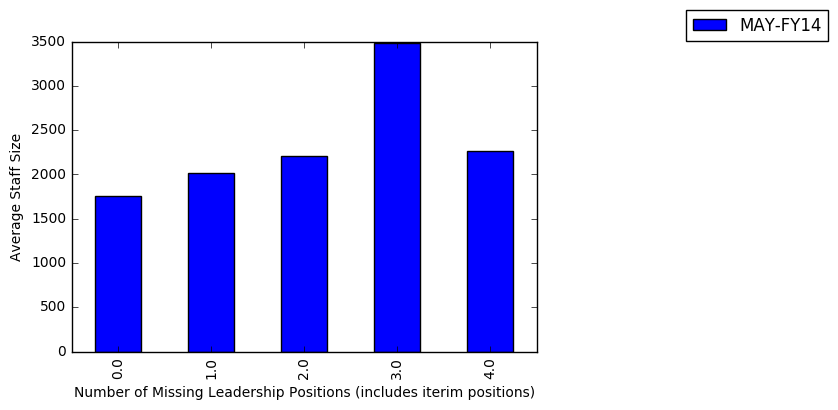

In [22]:
values = ['MAY-FY14']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions (includes iterim positions)")
ax.set_ylabel("Average Staff Size")

#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

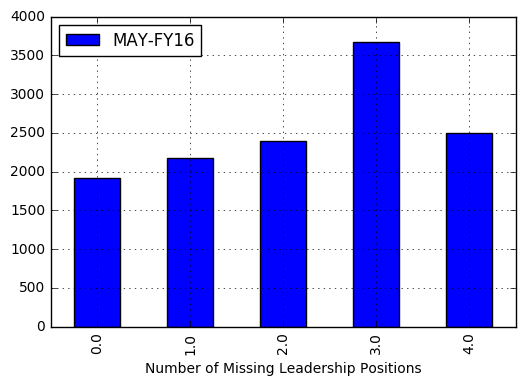

In [23]:
values = ["MAY-FY16"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)

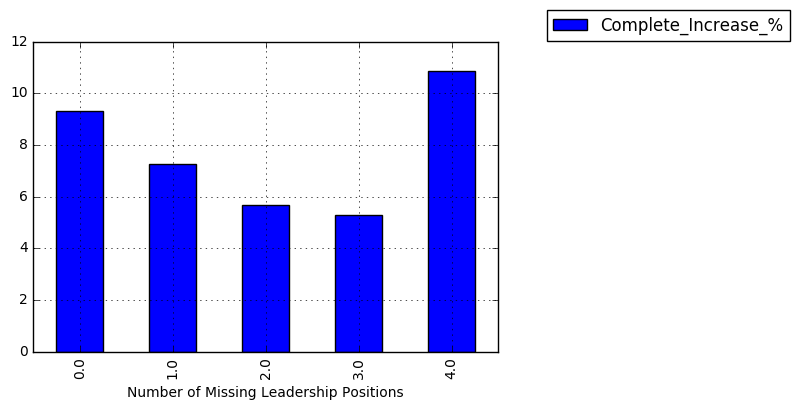

In [24]:
values = ["Complete_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)


plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

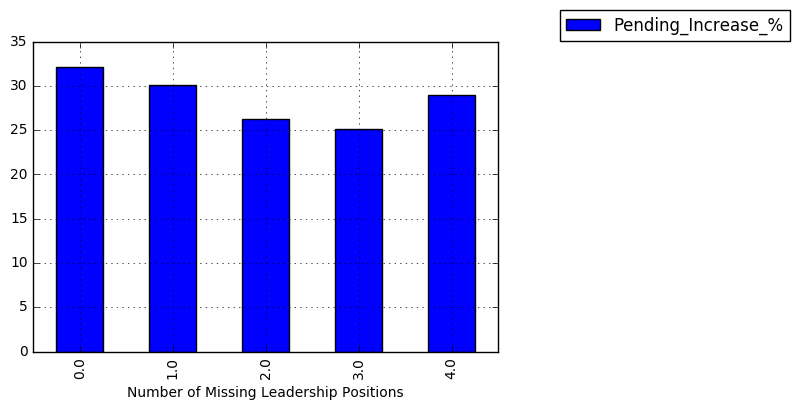

In [25]:
values = ["Pending_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
While the raw numbers show more completed appointments, it appears that this is just because there are bigger stations. Missing leadership does appear to have an affect on the percent increase of completed appointments. Pending saw a similar affect. 

# Wait Times

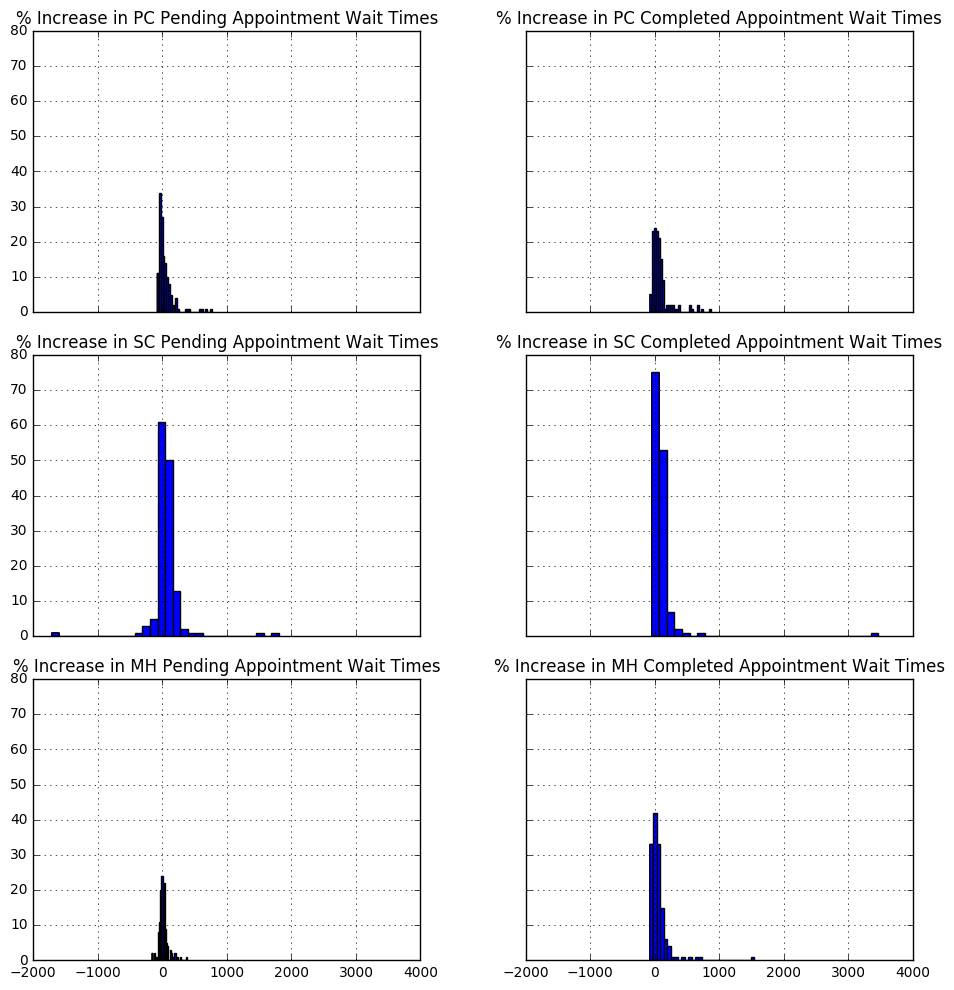

In [26]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10,10))

df["PC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax1)
ax1.set_title("% Increase in PC Pending Appointment Wait Times")

df["PC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax2)
ax2.set_title("% Increase in PC Completed Appointment Wait Times")

df["SC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax3)
ax3.set_title("% Increase in SC Pending Appointment Wait Times")

df["SC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax4)
ax4.set_title("% Increase in SC Completed Appointment Wait Times")

df["MH_Wait_Pending_Increase_%"].hist(bins=30, ax=ax5)
ax5.set_title("% Increase in MH Pending Appointment Wait Times")

df["MH_Wait_Complete_Increase_%"].hist(bins=30, ax=ax6)
ax6.set_title("% Increase in MH Completed Appointment Wait Times")

plt.tight_layout()

In [27]:
def multiples(metric, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
    ax1.set_title("PC Pending")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,color='teal', edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,color='teal', edgecolor='none',alpha=.5)
    ax2.set_title("PC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,color='teal', edgecolor='none',alpha=.5)
    ax3.set_title("SC Pending")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,color='teal', edgecolor='none',alpha=.5)
    ax4.set_title("SC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,color='teal', edgecolor='none',alpha=.5)
    ax5.set_title("MH Pending")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,color='teal', edgecolor='none',alpha=.5)
    ax6.set_title("MH Complete")
    plt.tight_layout()


In [28]:
-
    
    


Staff Increase, Wait Times % Increase


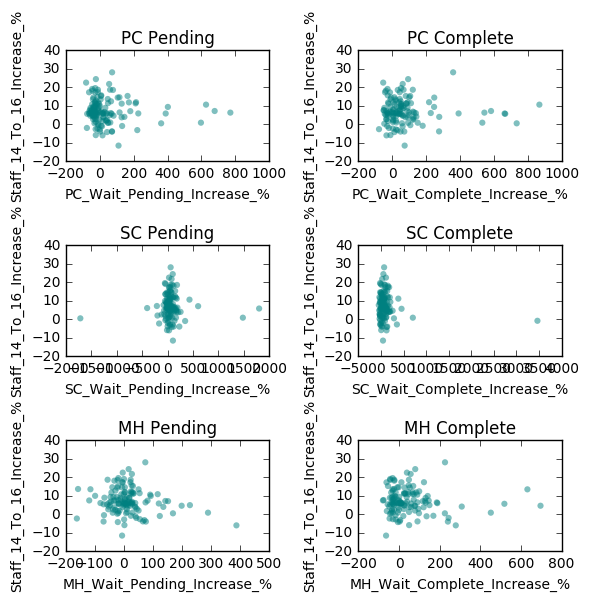

In [29]:
multiples('Staff_14_To_16_Increase_%', 'Staff Increase')

Choice Hires Percent Increase over 2014 Staff, Wait Times % Increase


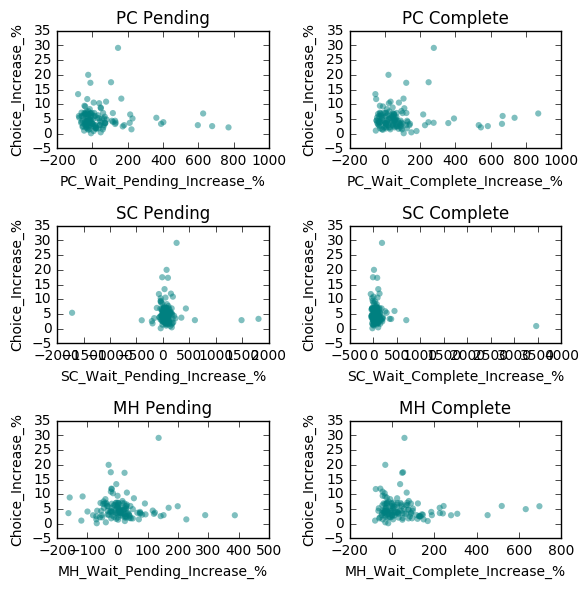

In [30]:
multiples("Choice_Increase_%","Choice Hires Percent Increase over 2014 Staff")

In [31]:
def multiples_wait(metric1, metric2, metric3, metric4, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

    ax1.set_title("Pending Dec 2014")
    df.plot(kind ='scatter',y=metric1, x ="PC_Wait_Pending_1412", ax=ax1)

    ax2.set_title("Complete Sept 2014")
    df.plot(kind ='scatter',y=metric2, x ="PC_Wait_Complete_1409", ax=ax2)

    ax3.set_title("Pending Oct 2016")
    df.plot(kind ='scatter',y=metric3, x ="SC_Wait_Pending_1610", ax=ax3)

    ax4.set_title("Complete Aug 2016")
    df.plot(kind ='scatter',y=metric4, x ="SC_Wait_Complete_1608", ax=ax4)

    plt.tight_layout()

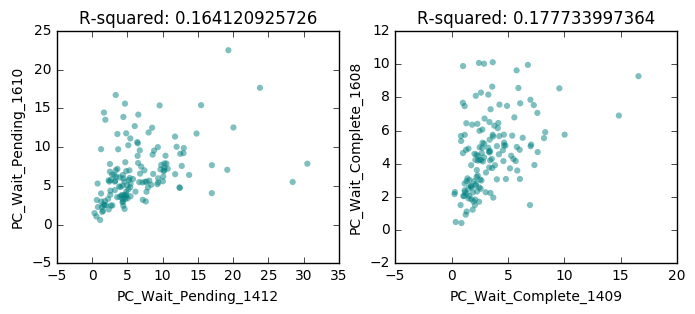

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))



slope, intercept, r_value, p_value, std_err = stats.linregress(df["PC_Wait_Pending_1412"],df["PC_Wait_Pending_1610"])
R =  "R-squared: "+ str(r_value**2)
ax1.set_title(R)
df.plot(kind='scatter',x="PC_Wait_Pending_1412",y="PC_Wait_Pending_1610",ax=ax1,color='teal', edgecolor='none',alpha=.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["PC_Wait_Complete_1409"],df["PC_Wait_Complete_1608"])
R =  "R-squared: "+ str(r_value**2)
ax2.set_title(R)
df.plot(kind='scatter',x="PC_Wait_Complete_1409",y="PC_Wait_Complete_1608",ax=ax2,color='teal', edgecolor='none',alpha=.5)


### Thoughts

It should be incredible rare for any station to have a higher number of choice hires than staff increase between 2014 and 2016 - unless staffing was reduced. In places where staffing wasn't reduced, this shouldn't happen often if at all.

For one, Veterans Choice passed June 11th, 2014. These staffing numbers are for May for each year. This choice hire data is also for June, so there is an extremely small window here for big shifts. From my understand, the choice hires were meant to be in addition to normal hires. This seems to suggest that many positions that should have been filled in without the extra spending money were filled in by choice hires.

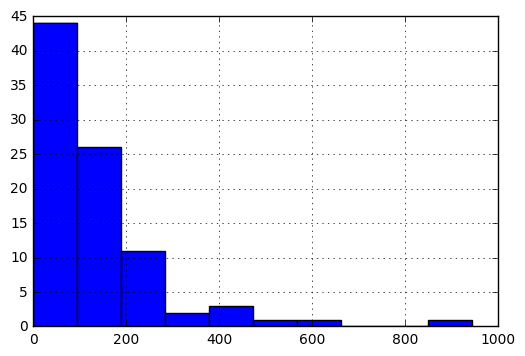

In [33]:
hist = df[df["Choice_Staff_Dif"]>0]
hist["Choice_Staff_Dif"].hist()

In [34]:
staff_increased = df[df["Staff_14_To_16_Increase_%"] >0]
choice_staff_dif = staff_increased[staff_increased["Choice_Staff_Dif"] < 0]
choice_staff_dif[["Name","Choice_Staff_Dif","Staff_14_To_16_Increase","Choice_Hires"]]

,Name,Choice_Staff_Dif,Staff_14_To_16_Increase,Choice_Hires
8,"ALBANY, NY",-12.0,2.0,14.0
14,"NEW JERSEY HCS, NJ",-1.0,50.0,51.0
19,"ALTOONA, PA",-55.0,13.0,68.0
20,"BUTLER, PA",-28.0,3.0,31.0
21,"CLARKSBURG, WV",-13.0,46.0,59.0
23,"ERIE, PA",-26.0,4.0,30.0
25,"PHILADELPHIA, PA",-102.0,61.0,163.0
27,"WILKES��BARRE, PA",-13.0,58.0,71.0
28,"BALTIMORE HCS, MD",-34.0,196.0,230.0
30,"WASHINGTON, DC",-37.0,67.0,104.0


In [35]:
df[df["Choice_Staff_Dif"] < 0][["Name","Choice_Staff_Dif","Staff_14_To_16_Increase","Choice_Hires"]]

,Name,Choice_Staff_Dif,Staff_14_To_16_Increase,Choice_Hires
8,"ALBANY, NY",-12.0,2.0,14.0
14,"NEW JERSEY HCS, NJ",-1.0,50.0,51.0
15,"VA HUDSON VALLEY HCS, NY",-107.0,-86.0,21.0
16,"NEW YORK HARBOR HCS, NY",-166.0,-112.0,54.0
17,"NORTHPORT, NY",-67.0,-20.0,47.0
18,"WILMINGTON, DE",-74.0,-18.0,56.0
19,"ALTOONA, PA",-55.0,13.0,68.0
20,"BUTLER, PA",-28.0,3.0,31.0
21,"CLARKSBURG, WV",-13.0,46.0,59.0
22,"COATESVILLE, PA",-110.0,-73.0,37.0


## Staff

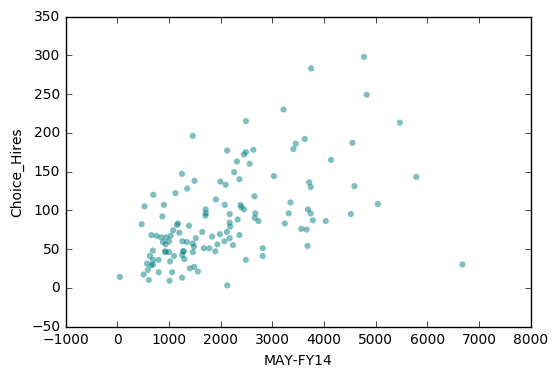

In [36]:
df[["Choice_Hires","MAY-FY14"]].plot(kind='scatter',y='Choice_Hires',x="MAY-FY14",color='teal', edgecolor='none',alpha=.5)

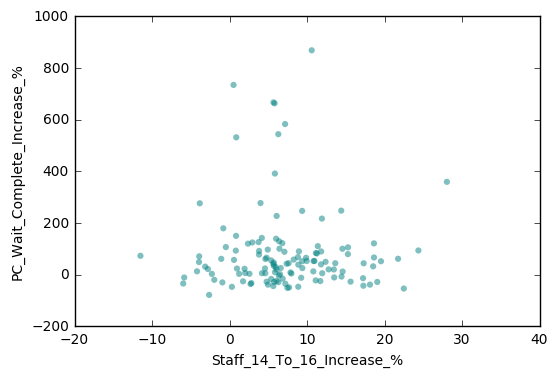

In [37]:
df.plot(kind="scatter",x="Staff_14_To_16_Increase_%",y="PC_Wait_Complete_Increase_%",color='teal', edgecolor='none',alpha=.5)

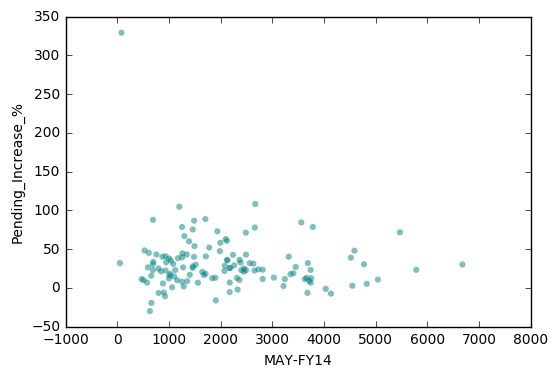

In [38]:
df.plot(kind="scatter",x="MAY-FY14",y="Pending_Increase_%",color='teal', edgecolor='none',alpha=.5)

R-squared: 0.0479053097538


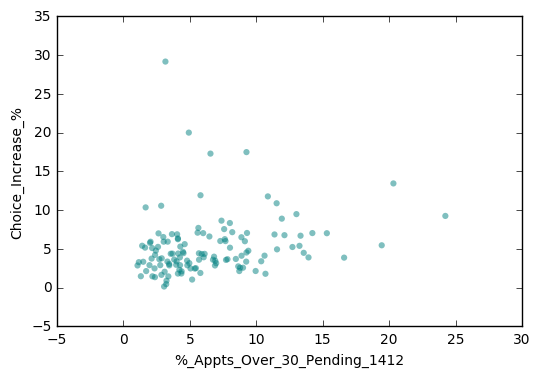

In [39]:
df.plot(kind='scatter',x="%_Appts_Over_30_Pending_1412",y="Choice_Increase_%",color='teal',edgecolor='none',alpha=.5)

no_null = df[df["Choice_Increase_%"].notnull()]

slope, intercept, r_value, p_value, std_err = stats.linregress(no_null["%_Appts_Over_30_Pending_1412"],no_null["Choice_Increase_%"])
R =  "R-squared: "+ str(r_value**2)
print R

# Let's double check some of these correlation - or lack of correlations - by binning them

## Wait Times

In [40]:
def grouped(group,valuey):
    table = pd.pivot_table(df,index=[group],values=[valuey],aggfunc=[np.mean])
    table.columns = table.columns.get_level_values(0)
    table = table.reset_index()
    table.columns = [group,valuey]
    table.plot(kind="bar",x=group,y=valuey,color='teal',edgecolor='none')
    
def grouped_reverse(group,valuey):
    table = pd.pivot_table(df,index=[group],values=[valuey],aggfunc=[np.mean])
    table.columns = table.columns.get_level_values(0)
    table = table.reset_index()
    table.columns = [group,valuey]
    table.plot(kind="bar",y=group,x=valuey,color='teal',edgecolor='none')

def ceil_100(number):
    return ceil(number*100)

def ceil_100_divide(number):
    return ceil(number/100)*100

In [41]:
# binning
df["PC_Wait_Pending_1412_ceil"] = df["PC_Wait_Pending_1412"].apply(ceil)
df["PC_Wait_Pending_1610_ceil"] = df["PC_Wait_Pending_1610"].apply(ceil)
df["PC_Wait_Complete_1409_ceil"] = df["PC_Wait_Complete_1409"].apply(ceil)
df["PC_Wait_Complete_1608_ceil"] = df["PC_Wait_Complete_1608"].apply(ceil)
df['PC_Wait_Pending_Increase_%_ceil']=df['PC_Wait_Pending_Increase_%'].apply(ceil)
df['Choice_Increase_%_ceil']=df['Choice_Increase_%'].apply(ceil_100)
df['MAY-FY14_Ceil'] = df["MAY-FY14"].apply(ceil_100_divide)




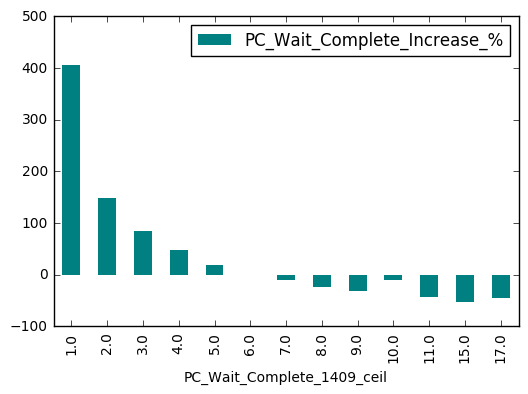

In [42]:
grouped("PC_Wait_Complete_1409_ceil",'PC_Wait_Complete_Increase_%')


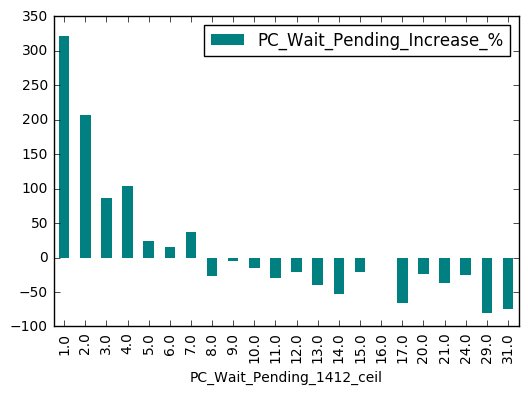

In [43]:
grouped("PC_Wait_Pending_1412_ceil",'PC_Wait_Pending_Increase_%')


## Hires

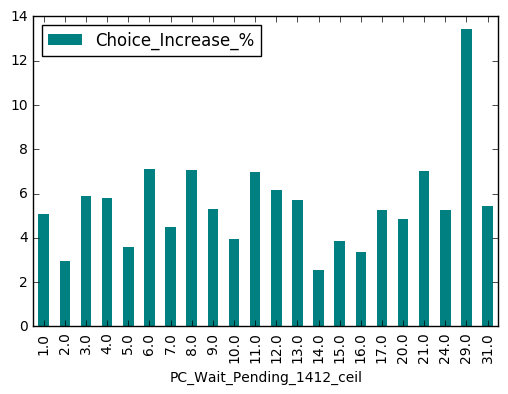

In [44]:
grouped("PC_Wait_Pending_1412_ceil",'Choice_Increase_%')


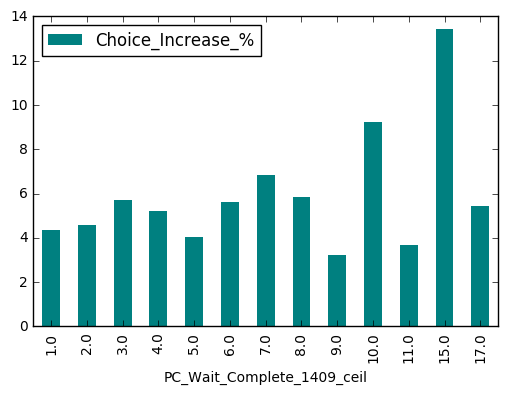

In [45]:
grouped("PC_Wait_Complete_1409_ceil",'Choice_Increase_%')


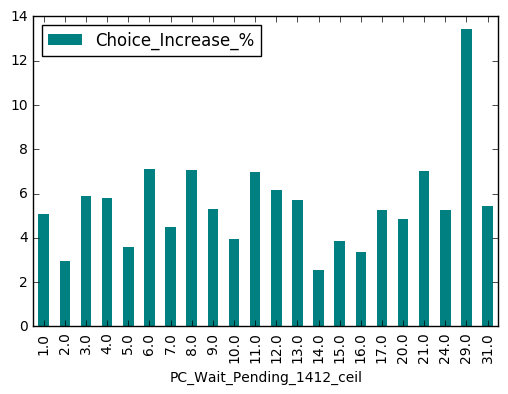

In [46]:
grouped("PC_Wait_Pending_1412_ceil",'Choice_Increase_%')


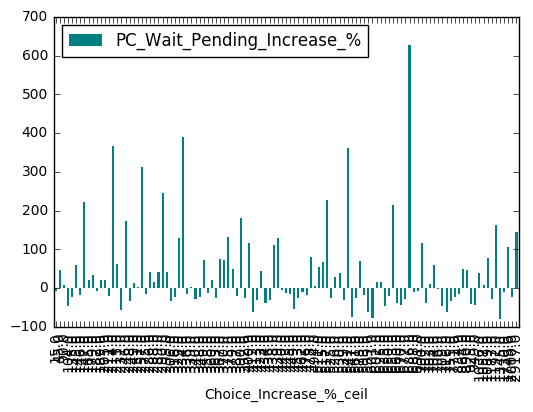

In [47]:
grouped('Choice_Increase_%_ceil','PC_Wait_Pending_Increase_%')


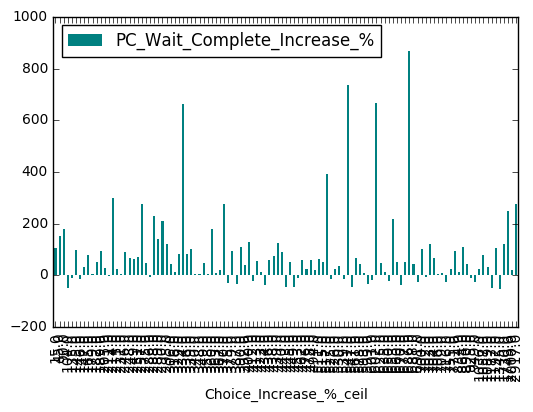

In [48]:
grouped('Choice_Increase_%_ceil','PC_Wait_Complete_Increase_%')


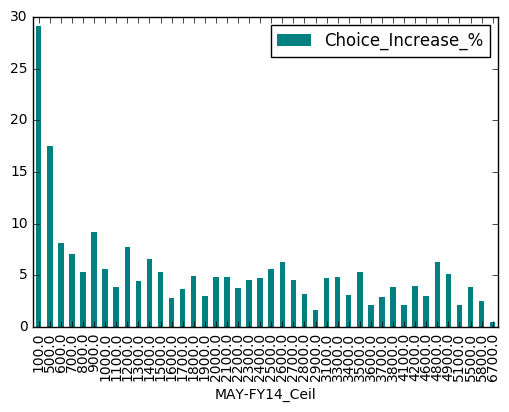

In [49]:
grouped('MAY-FY14_Ceil','Choice_Increase_%',)


In [50]:
df["Choice_Increase_%"]

0       3.663289
1       5.103149
2       1.039169
3       2.132937
4       6.997085
5       4.528302
6       4.396423
7       1.458037
8      29.166667
9            NaN
10      0.449236
11           NaN
12           NaN
13      2.870006
14      1.813011
15      1.348748
16      1.467790
17      2.480211
18      6.002144
19     10.350076
20      5.400697
21      6.696935
22      2.857143
23      4.354136
24      5.776173
25      7.050173
26      5.255432
27      5.926544
28      7.153966
29      3.050239
         ...    
110     3.397829
111     1.647446
112     3.359684
113     6.858202
114     3.474078
115     7.701422
116     5.293631
117    11.915367
118    17.484009
119     6.528662
120          NaN
121    10.562572
122    10.883140
123          NaN
124     3.992257
125    11.769416
126     6.250000
127     5.149182
128     5.929691
129     8.638007
130     4.755614
131     2.142432
132     4.618474
133     6.900212
134     1.888574
135     2.048061
136          NaN
137          N

# Did psychiatrist go where they were needed?

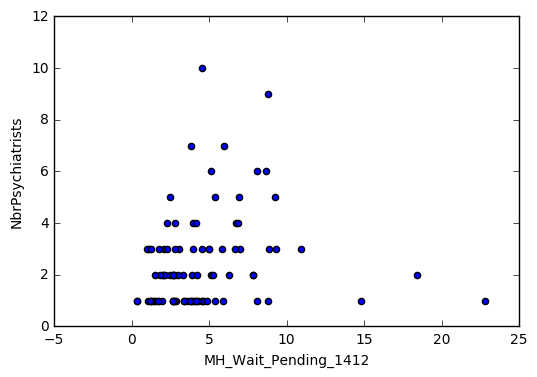

In [51]:
df.plot(kind='scatter',x='MH_Wait_Pending_1412',y="NbrPsychiatrists")

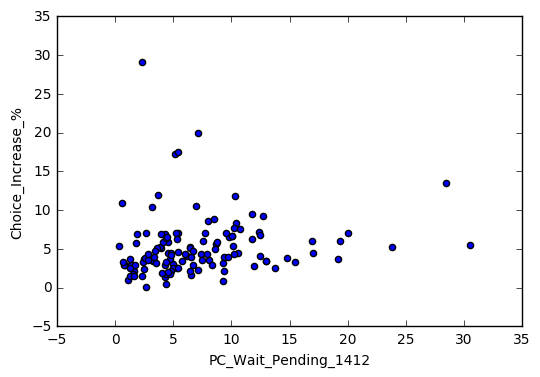

In [52]:
df.plot(kind='scatter',x='PC_Wait_Pending_1412',y="Choice_Increase_%")

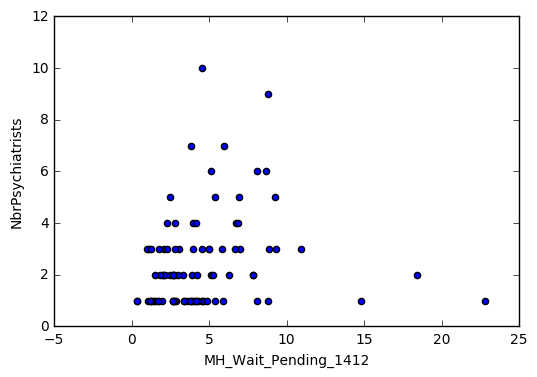

In [53]:
df.plot(kind='scatter',x='MH_Wait_Pending_1412',y="NbrPsychiatrists")

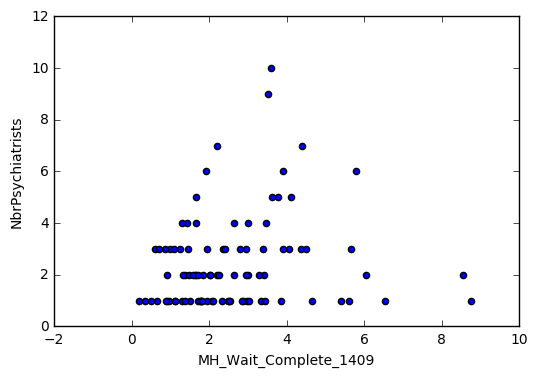

In [54]:
df.plot(kind='scatter',x='MH_Wait_Complete_1409',y="NbrPsychiatrists")

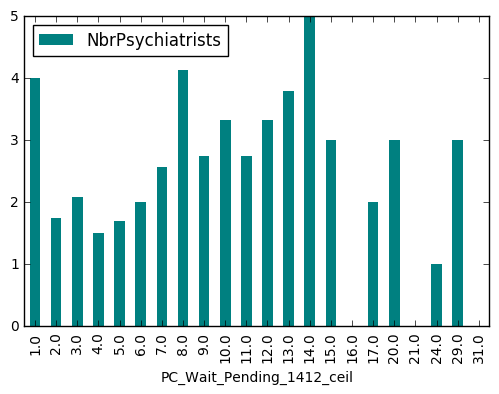

In [55]:
grouped("PC_Wait_Pending_1412_ceil",'NbrPsychiatrists')

# Did staffing corespond with appointments?

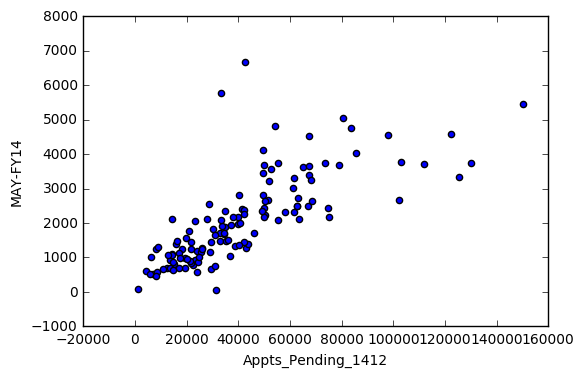

In [56]:
df.plot(kind='scatter',x='Appts_Pending_1412',y='MAY-FY14')

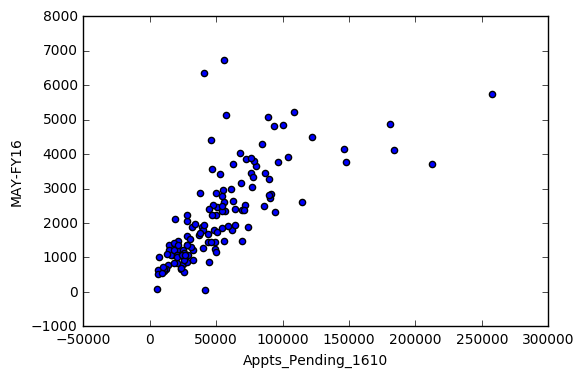

In [57]:
df.plot(kind='scatter',x='Appts_Pending_1610',y='MAY-FY16')

# Looking at percent appointments over 30 days instead

Percent of Appointments Over 30 days Pending Dec 2014, Wait Times % Increase


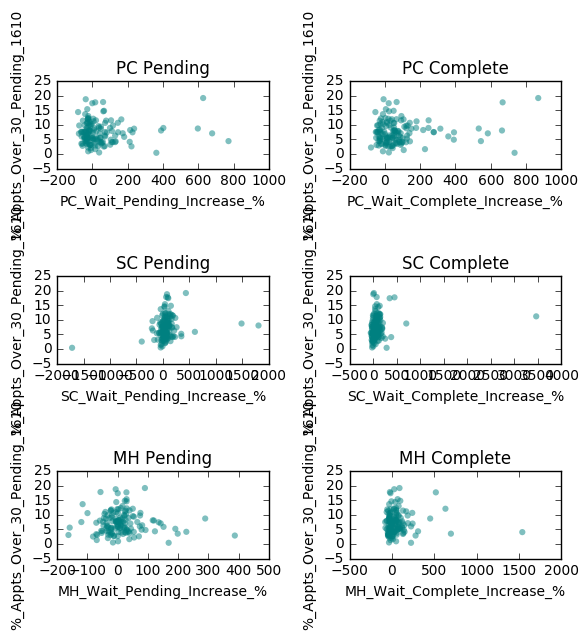

In [58]:
multiples('%_Appts_Over_30_Pending_1610','Percent of Appointments Over 30 days Pending Dec 2014')

In [59]:
def over_30_to_average(care,appointment,date,ax):

    df.plot(kind='scatter',x='{}_Wait_{}_{}'.format(care,appointment,date),y='%_Appts_Over_30_{}_{}'.format(appointment,date),ax=ax,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df['{}_Wait_{}_{}'.format(care,appointment,date)],df['%_Appts_Over_30_{}_{}'.format(appointment,date)])
    ax.set_title("R-squared {} {} {}: {}".format(care,appointment,date,str(r_value**2)))

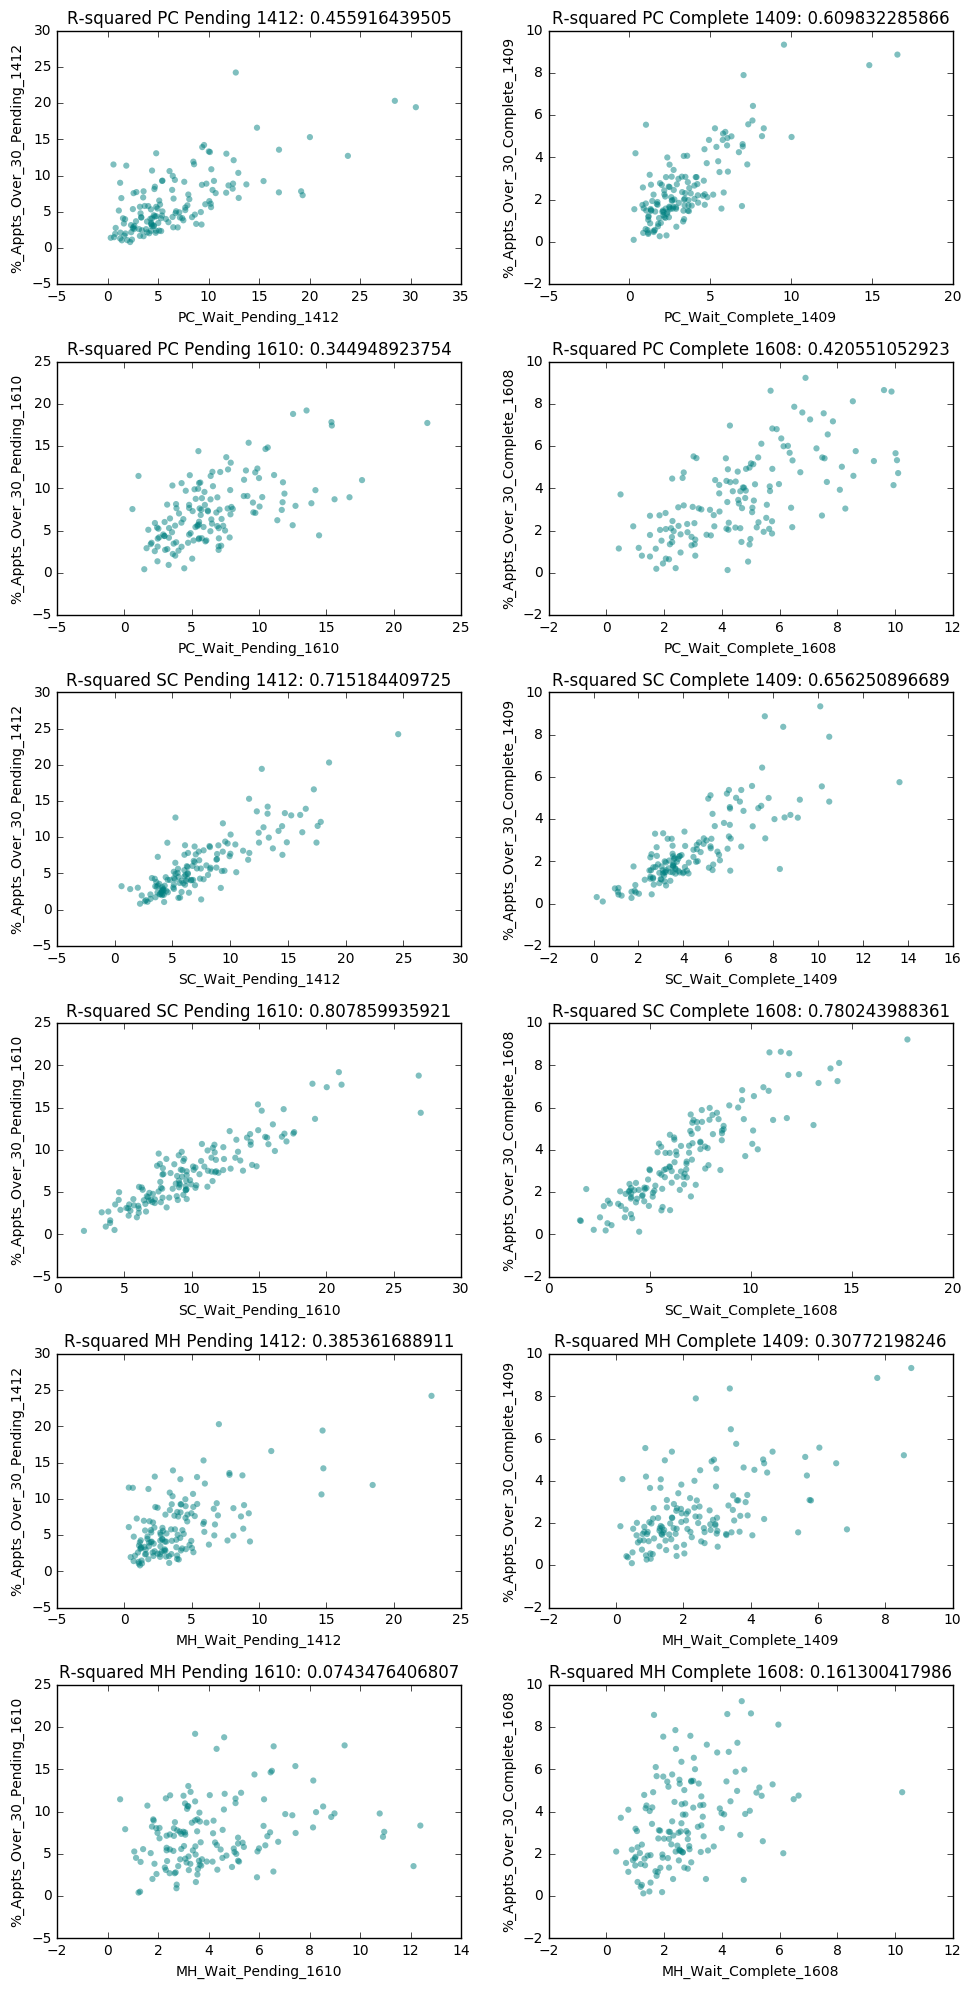

In [60]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
over_30_to_average("PC","Pending","1412",ax1)
over_30_to_average("PC","Complete","1409",ax2)
over_30_to_average("PC","Pending","1610",ax3)
over_30_to_average("PC","Complete","1608",ax4)
over_30_to_average("SC","Pending","1412",ax5)
over_30_to_average("SC","Complete","1409",ax6)
over_30_to_average("SC","Pending","1610",ax7)
over_30_to_average("SC","Complete","1608",ax8)
over_30_to_average("MH","Pending","1412",ax9)
over_30_to_average("MH","Complete","1409",ax10)
over_30_to_average("MH","Pending","1610",ax11)
over_30_to_average("MH","Complete","1608",ax12)

plt.tight_layout()


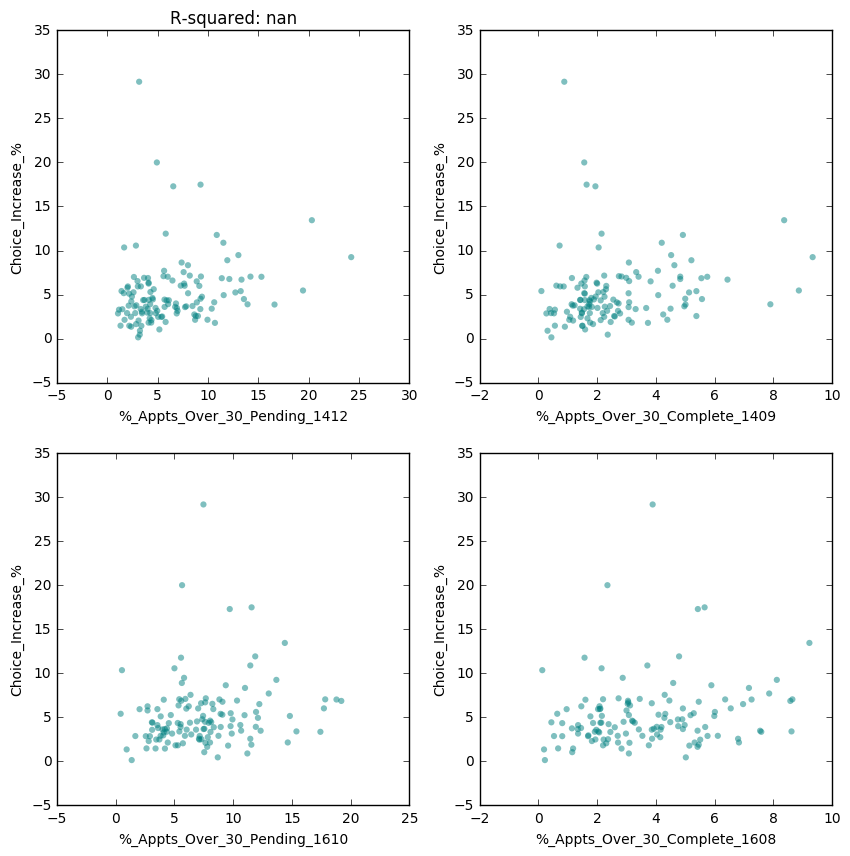

In [61]:
def over_30_factor(factor):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    df.plot(kind='scatter',x='%_Appts_Over_30_Pending_1412',y=factor,ax=ax1,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Pending_1412"],df[factor])
    ax1.set_title("R-squared: {}".format(str(r_value**2)))    

    df.plot(kind='scatter',x='%_Appts_Over_30_Complete_1409',y=factor,ax=ax2,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Complete_1409"],df[factor])
    #ax2.set_title("R-squared: {}".format(str(r_value**2)))  
    
    df.plot(kind='scatter',x='%_Appts_Over_30_Pending_1610',y=factor,ax=ax3,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Pending_1610"],df[factor])
    #ax3.set_title("R-squared: {}".format(str(r_value**2)))  
    
    df.plot(kind='scatter',x='%_Appts_Over_30_Complete_1608',y=factor,ax=ax4,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Complete_1608"],df[factor])
    #ax4.set_title("R-squared: {}".format(str(r_value**2)))  
    
    
    
    
over_30_factor("Choice_Increase_%")


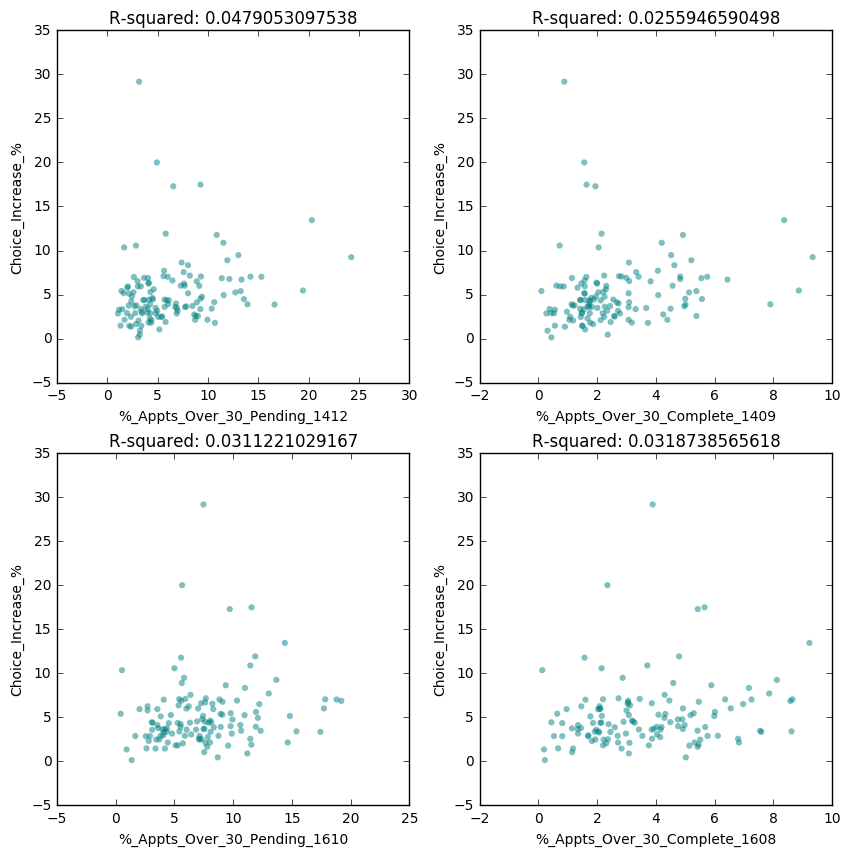

In [62]:
df_staff = df[df["Choice_Increase_%"].notnull()]

def over_30_factor_staff(factor):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    df_staff.plot(kind='scatter',x='%_Appts_Over_30_Pending_1412',y=factor,ax=ax1,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_staff["%_Appts_Over_30_Pending_1412"],df_staff[factor])
    ax1.set_title("R-squared: {}".format(str(r_value**2)))    

    df_staff.plot(kind='scatter',x='%_Appts_Over_30_Complete_1409',y=factor,ax=ax2,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_staff["%_Appts_Over_30_Complete_1409"],df_staff[factor])
    ax2.set_title("R-squared: {}".format(str(r_value**2)))  
    
    df_staff.plot(kind='scatter',x='%_Appts_Over_30_Pending_1610',y=factor,ax=ax3,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_staff["%_Appts_Over_30_Pending_1610"],df_staff[factor])
    ax3.set_title("R-squared: {}".format(str(r_value**2)))  
    
    df_staff.plot(kind='scatter',x='%_Appts_Over_30_Complete_1608',y=factor,ax=ax4,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_staff["%_Appts_Over_30_Complete_1608"],df_staff[factor])
    ax4.set_title("R-squared: {}".format(str(r_value**2)))  
    
    
    
    
over_30_factor_staff("Choice_Increase_%")


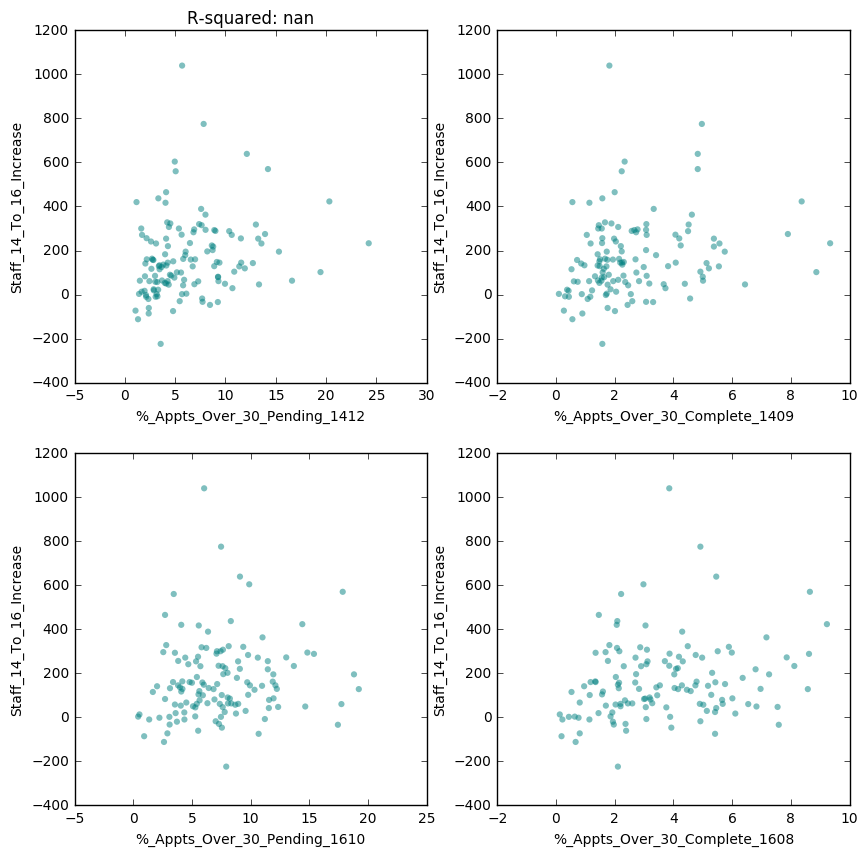

In [63]:
over_30_factor('Staff_14_To_16_Increase')

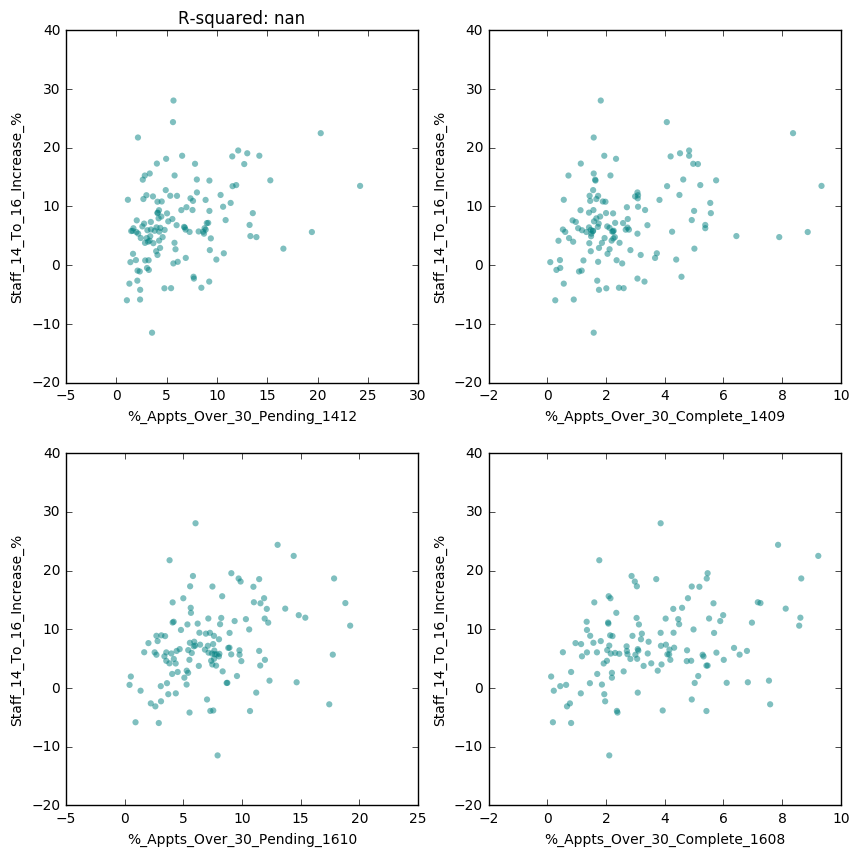

In [64]:
over_30_factor('Staff_14_To_16_Increase_%')

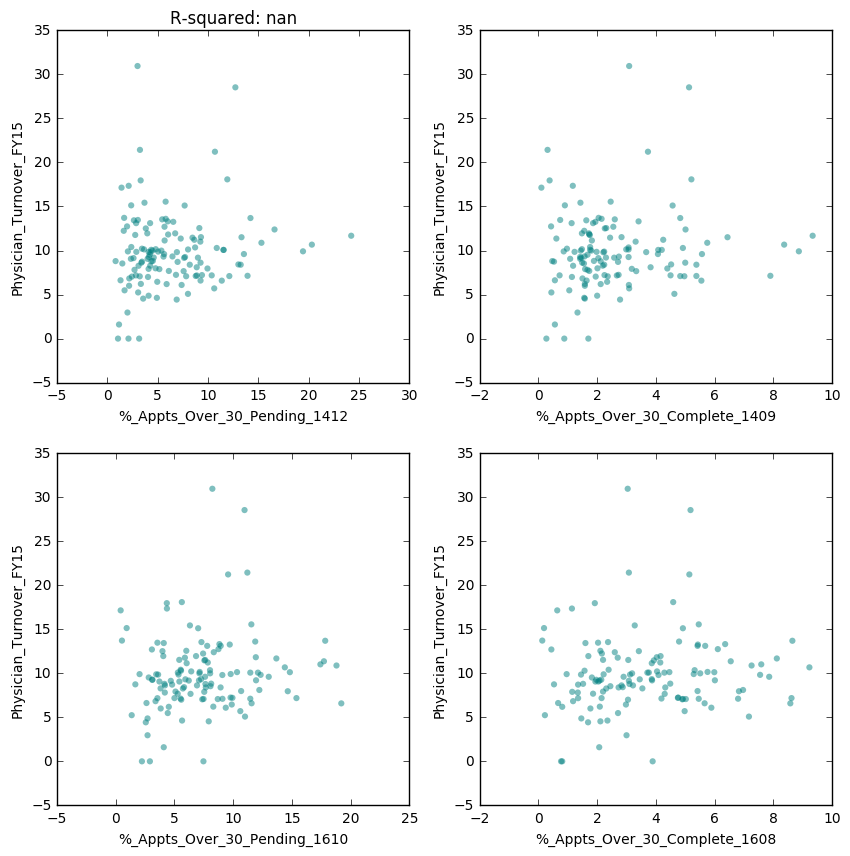

In [65]:
over_30_factor('Physician_Turnover_FY15')

In [66]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'for_dups', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'ID',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

test, Wait Times % Increase


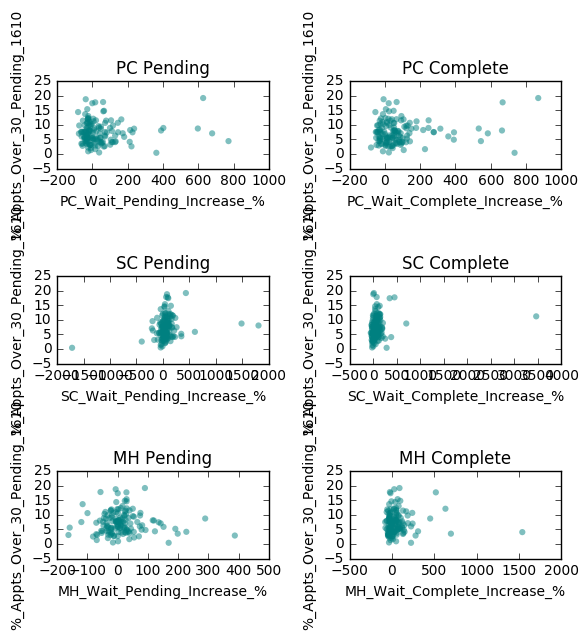

In [67]:
metric = '%_Appts_Over_30_Pending_1610'
label = 'test'
print("{}, Wait Times % Increase".format(label))
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
ax1.set_title("PC Pending")
#ax1.set_ylabel(False)
#ax1.set_ylabel(False)
df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,color='teal', edgecolor='none',alpha=.5)

df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,color='teal', edgecolor='none',alpha=.5)
ax2.set_title("PC Complete")

df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,color='teal', edgecolor='none',alpha=.5)
ax3.set_title("SC Pending")

df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,color='teal', edgecolor='none',alpha=.5)
ax4.set_title("SC Complete")

df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,color='teal', edgecolor='none',alpha=.5)
ax5.set_title("MH Pending")

df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,color='teal', edgecolor='none',alpha=.5)
ax6.set_title("MH Complete")
plt.tight_layout()

In [68]:
df['%_Appts_Over_30_Pending_1610']

0       4.18
1       3.83
2       7.54
3       4.43
4       4.09
5       6.92
6       3.13
7       3.39
8       7.47
9       4.08
10      8.69
11      8.96
12      6.35
13      1.67
14      5.09
15      0.93
16      2.62
17      3.72
18      7.02
19      0.53
20      0.42
21      7.62
22      2.91
23      5.28
24      2.71
25      5.41
26      4.69
27      3.55
28      7.67
29      6.43
       ...  
110    15.39
111     7.79
112     4.35
113    19.21
114    12.34
115    13.03
116     9.08
117    11.88
118    11.57
119     8.23
120     2.23
121     5.00
122    11.46
123    10.71
124     9.78
125     5.56
126     6.22
127    14.83
128     8.31
129     9.37
130     9.94
131    14.65
132     8.04
133    10.33
134    11.55
135     5.72
136    10.62
137    10.25
138     4.15
139     6.32
Name: %_Appts_Over_30_Pending_1610, dtype: float64

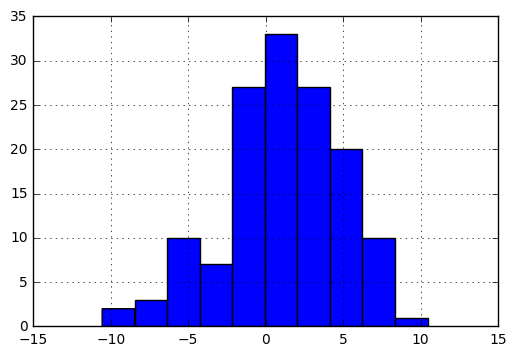

In [69]:
df["Percentage_Point_Wait_Over_30_Increase_Pending"].hist()

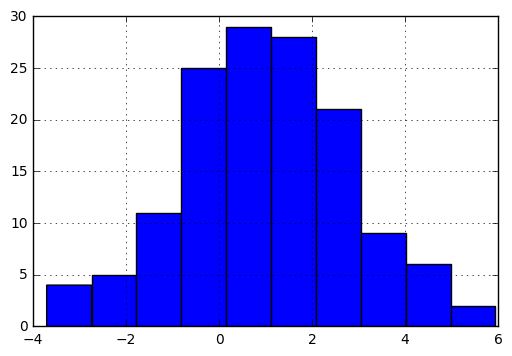

In [70]:
df["Percentage_Point_Wait_Over_30_Increase_Complete"].hist()

# What's the distribution of choice hire need

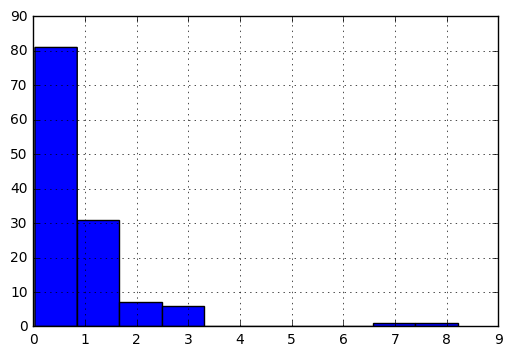

In [71]:
df["Choice_Increase_%_PC_Wait_Complete_1409_Ratio"].hist()

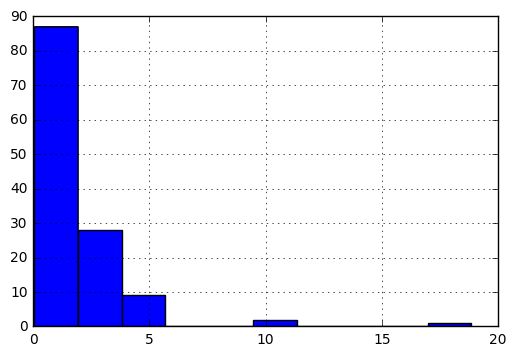

In [72]:
df["Choice_Increase_%_PC_Wait_Pending_1412_Ratio"].hist()

# Any connection with staff to appointment ratio and wait times?

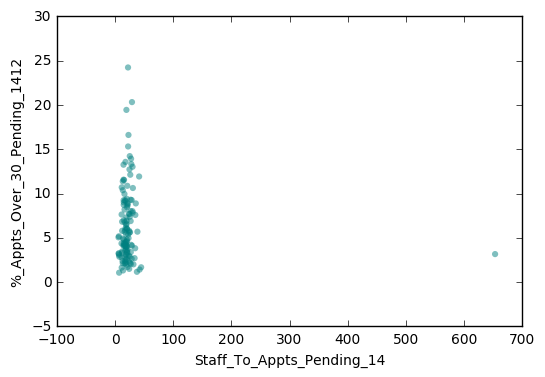

In [73]:
df.plot(kind='scatter',x='Staff_To_Appts_Pending_14',y="%_Appts_Over_30_Pending_1412",color='teal',edgecolor='none',alpha=.5)

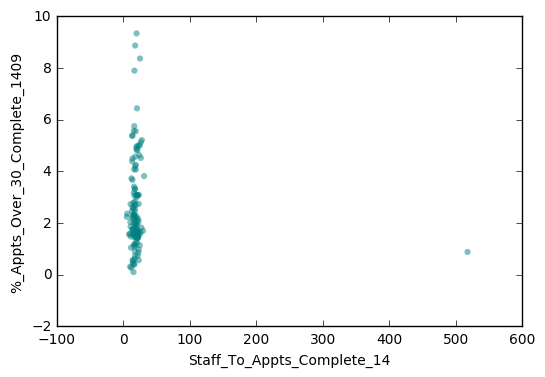

In [74]:
df.plot(kind='scatter',x='Staff_To_Appts_Complete_14',y="%_Appts_Over_30_Complete_1409",color='teal',edgecolor='none',alpha=.5)

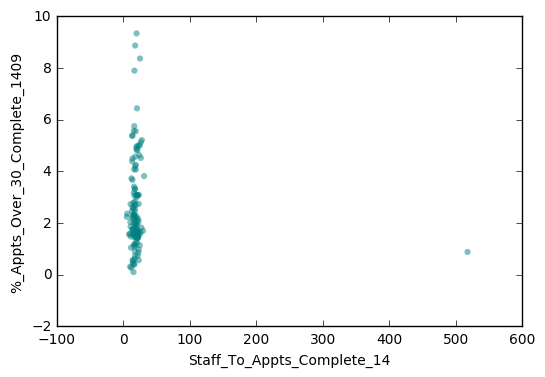

In [75]:
df.plot(kind='scatter',x='Staff_To_Appts_Complete_14',y="%_Appts_Over_30_Complete_1409",color='teal',edgecolor='none',alpha=.5)

# For San Diego -  To Delete

In [76]:
df[df["NbrPsychiatrists"]>5]["NbrPsychiatrists"]

30      9.0
59      6.0
88      6.0
96      6.0
102     7.0
128     7.0
129    10.0
Name: NbrPsychiatrists, dtype: float64

In [77]:
df[df["NbrPsychiatrists"]>5]

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,qualitative_size,State_Full,Vet_Pop,PC_Wait_Pending_1412_ceil,PC_Wait_Pending_1610_ceil,PC_Wait_Complete_1409_ceil,PC_Wait_Complete_1608_ceil,PC_Wait_Pending_Increase_%_ceil,Choice_Increase_%_ceil,MAY-FY14_Ceil
30,41268,5.89,7.91,6.31,8.83,688,(V05) (688) MC WASHINGTON DC,2240.0,2228.0,2249.0,...,average,District of Columbia ...,29470.0,8.0,5.0,5.0,4.0,-39.0,434.0,2400.0
59,130280,7.58,10.71,6.04,8.66,626,(V09) (626) HCS NASHVILLE TN,3448.0,3488.0,3589.0,...,large,Tennessee ...,503675.0,11.0,8.0,7.0,8.0,-32.0,755.0,3800.0
88,97792,8.89,12.43,6.09,5.12,580,(V16) (580) MC HOUSTON TX,3779.0,3905.0,4180.0,...,large,Texas ...,1675262.0,13.0,5.0,5.0,4.0,-61.0,412.0,4600.0
96,52506,8.72,9.35,6.92,8.10,671,(V17) (671) HCS SAN ANTONIO TX,3490.0,3381.0,3512.0,...,large,Texas ...,1675262.0,10.0,6.0,5.0,7.0,-36.0,214.0,3600.0
102,68521,12.12,12.49,17.85,5.98,644,(V18) (644) MC PHOENIX AZ,2398.0,2368.0,2443.0,...,large,Arizona ...,528486.0,13.0,10.0,5.0,8.0,-26.0,677.0,2700.0
128,49174,3.33,8.78,3.75,3.86,600,(V22) (600) HCS LONG BEACH CA,2308.0,2358.0,2343.0,...,average,California,1802446.0,9.0,10.0,6.0,5.0,9.0,593.0,2400.0
129,62831,7.38,8.00,9.95,4.54,605,(V22) (605) MC LOMA LINDA CA,2374.0,2341.0,2431.0,...,average,California,1802446.0,8.0,12.0,4.0,8.0,49.0,864.0,2500.0


In [78]:
df[df["Choice_Increase_%_PC_Wait_Complete_1409_Ratio"]>200]["Choice_Increase_%_PC_Wait_Complete_1409_Ratio"]

Series([], Name: Choice_Increase_%_PC_Wait_Complete_1409_Ratio, dtype: float64)

In [79]:
columns = ["Location","PC_Wait_Complete_1409","MH_Wait_Complete_1409","MAY-FY14","Choice_Increase_%","Choice_Hires",
                                          "Choice_Increase_%_PC_Wait_Complete_1409_Ratio",
                                            "%_Appts_Over_30_Complete_1409","%_Appts_Over_30_Pending_1412","NbrPsychiatrists","Station"]
df[(df["Choice_Increase_%_PC_Wait_Complete_1409_Ratio"]<40)
   &(df["Choice_Increase_%"]>10)
   &(df["%_Appts_Over_30_Complete_1409"]<1.5)][columns]

,Location,PC_Wait_Complete_1409,MH_Wait_Complete_1409,MAY-FY14,Choice_Increase_%,Choice_Hires,Choice_Increase_%_PC_Wait_Complete_1409_Ratio,%_Appts_Over_30_Complete_1409,%_Appts_Over_30_Pending_1412,NbrPsychiatrists,Station
8,"(V02) (528) Albany, NY",1.28,3.02,48.0,29.166667,14.0,0.043886,0.88,3.16,1.0,528
121,"(V21) (459) Honolulu, HI",2.90,1.49,871.0,10.562572,92.0,0.274554,0.72,2.84,2.0,459


In [80]:
df[df["Station"]==664][columns]

,Location,PC_Wait_Complete_1409,MH_Wait_Complete_1409,MAY-FY14,Choice_Increase_%,Choice_Hires,Choice_Increase_%_PC_Wait_Complete_1409_Ratio,%_Appts_Over_30_Complete_1409,%_Appts_Over_30_Pending_1412,NbrPsychiatrists,Station
130,"(V22) (664) San Diego, CA",2.16,3.0,3028.0,4.755614,144.0,0.4542,2.25,9.4,4.0,664


In [81]:
df["%_Appts_Over_30_Complete_1409"].describe()

count    140.000000
mean       2.583643
std        1.735691
min        0.100000
25%        1.487500
50%        2.085000
75%        3.212500
max        9.340000
Name: %_Appts_Over_30_Complete_1409, dtype: float64

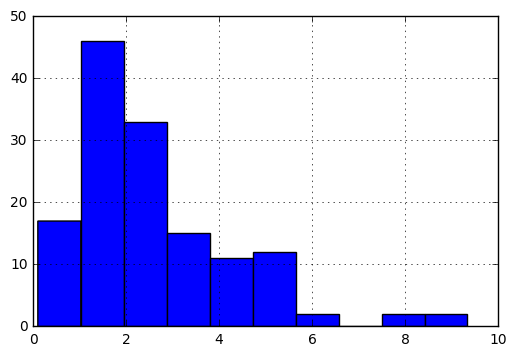

In [82]:
df["%_Appts_Over_30_Complete_1409"].hist()

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     128.000000
mean     2083.945312
std      1291.832973
min        48.000000
25%              NaN
50%              NaN
75%              NaN
max      6678.000000
Name: MAY-FY14, dtype: float64

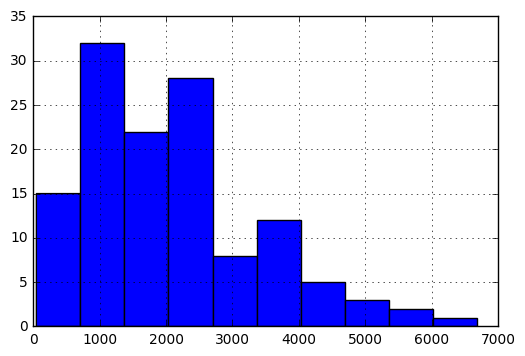

In [83]:
df["MAY-FY14"].hist()
df["MAY-FY14"].describe()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


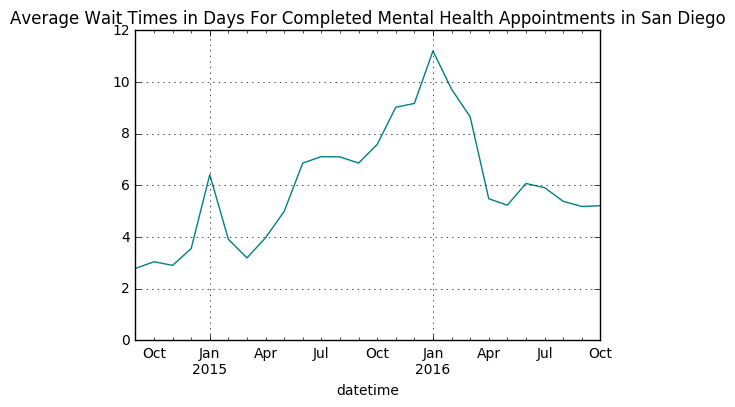

In [84]:
from datetime import datetime
def get_date(test):
    return datetime.strptime(test,"%m%y")

Diego = pd.read_csv("Data/San Diego/San_Diego_MH_V2.csv",dtype={"date":str})
Diego["datetime"] = Diego["date"].apply(get_date)

ax = Diego.sort("datetime").set_index("datetime").plot(color='teal')
ax.legend_.remove()
ax.set_title("Average Wait Times in Days For Completed Mental Health Appointments in San Diego")
ax.set_ylim(0,12)
ax.grid()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


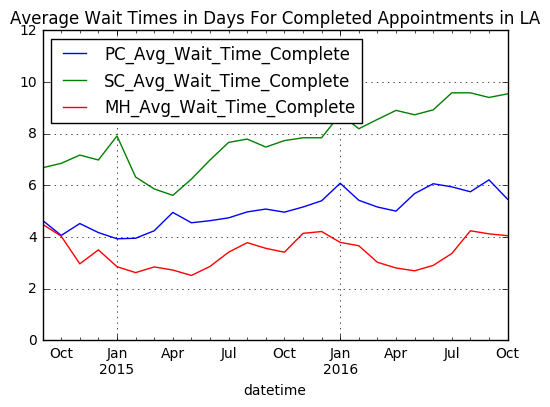

In [85]:
from datetime import datetime
def get_date(test):
    return datetime.strptime(test,"%m%y")

LA = pd.read_csv("Data/San Diego/LA_MH.csv",dtype={"date":str})
LA["datetime"] = LA["date"].apply(get_date)

ax = LA.sort("datetime").set_index("datetime").plot()
#ax.legend_.remove()
ax.set_title("Average Wait Times in Days For Completed Appointments in LA")
ax.set_ylim(0,12)
ax.grid()

In [86]:
Diego

,date,Avg_Wait_Time_Complete,datetime
0,1016,5.21,2016-10-01
1,916,5.18,2016-09-01
2,816,5.38,2016-08-01
3,716,5.91,2016-07-01
4,616,6.07,2016-06-01
5,516,5.23,2016-05-01
6,416,5.48,2016-04-01
7,316,8.65,2016-03-01
8,216,9.72,2016-02-01
9,116,11.20,2016-01-01


### Looking for stations that were doing well but got a lot of money

In [87]:
factor = "MH_Wait_Complete_1409"
filtered = master[master[factor] <= master[factor].quantile(q=.25)]
filtered = filtered[filtered["Choice_Increase_%"]>= master["Choice_Increase_%"].mean()]
filtered = filtered[filtered["MAY-FY16"]>1000]
len(filtered)
#filtered["MAY-FY16"]

8

In [88]:
master["MH_Wait_Complete_1409"].describe()

count    140.000000
mean       2.440286
std        1.650451
min        0.130000
25%        1.297500
50%        2.055000
75%        3.272500
max        8.770000
Name: MH_Wait_Complete_1409, dtype: float64

In [89]:
master["%_Appts_Over_30_Complete_1409"].describe()

count    140.000000
mean       2.583643
std        1.735691
min        0.100000
25%        1.487500
50%        2.085000
75%        3.212500
max        9.340000
Name: %_Appts_Over_30_Complete_1409, dtype: float64

In [90]:
master["Choice_Increase_%"].describe()

count    127.000000
mean       5.200187
std        3.875663
min        0.141176
25%             NaN
50%             NaN
75%             NaN
max       29.166667
Name: Choice_Increase_%, dtype: float64

In [91]:
filtered[["Location","Choice_Increase_%","Choice_Hires","MAY-FY14","MAY-FY16",
          "PC_Wait_Complete_1409","SC_Wait_Complete_1409","MH_Wait_Complete_1409",
         "%_Appts_Over_30_Complete_1409",
          "NbrPsychiatrists"]].to_csv("for_steve_v2.csv")

In [92]:
factor = "%_Appts_Over_30_Complete_1409"
filtered = master[master[factor] <= master[factor].quantile(q=.25)]
filtered = filtered[filtered["Choice_Increase_%"]>= master["Choice_Increase_%"].mean()]
filtered = filtered[filtered["MAY-FY16"]>1000]
len(filtered)
#filtered["MAY-FY16"]
#filtered[["Location","Choice_Increase_%","Choice_Hires","MAY-FY14","MAY-FY16",
#          "PC_Wait_Complete_1409","SC_Wait_Complete_1409","MH_Wait_Complete_1409",
#         "%_Appts_Over_30_Complete_1409","Name",
#          "NbrPsychiatrists"]].to_csv("for_steve_v3.csv")

7

In [93]:
master["%_Appts_Over_30_Complete_1409"].describe()

count    140.000000
mean       2.583643
std        1.735691
min        0.100000
25%        1.487500
50%        2.085000
75%        3.212500
max        9.340000
Name: %_Appts_Over_30_Complete_1409, dtype: float64

In [94]:
for column in filtered.columns:
    print column

Appts_Pending_1412
%_Appts_Over_30_Pending_1412
PC_Wait_Pending_1412
SC_Wait_Pending_1412
MH_Wait_Pending_1412
for_dups
ORGANIZATION
MAY-FY11
MAY-FY12
MAY-FY13
MAY-FY14
MAY-FY15
MAY-FY16
ID
Appts_Pending_1610
%_Appts_Over_30_Pending_1610
PC_Wait_Pending_1610
SC_Wait_Pending_1610
MH_Wait_Pending_1610
Appts_Complete_1608
%_Appts_Over_30_Complete_1608
PC_Wait_Complete_1608
SC_Wait_Complete_1608
MH_Wait_Complete_1608
Station
Location
Choice_Hires
Interim
Vacancy
%_Appts_Over_30_Complete_1409
Appts_Complete_1409
MH_Wait_Complete_1409
PC_Wait_Complete_1409
SC_Wait_Complete_1409
Physician_Turnover_FY11
Physician_Turnover_FY12
Physician_Turnover_FY13
Physician_Turnover_FY14
Physician_Turnover_FY15
NbrPsychiatrists
Pending_Increase
Pending_Increase_%
Complete_Increase
Complete_Increase_%
Complete_Pending_Appts_Diff_14
Complete_Pending_Appts_Diff_16
Complete_Pending_Appts_Diff_14_%
Complete_Pending_Appts_Diff_16_%
Complete_Pending_Gap_Increase_%
Missing_Leadership
Staff_11_To_12_Increase
Staff_1

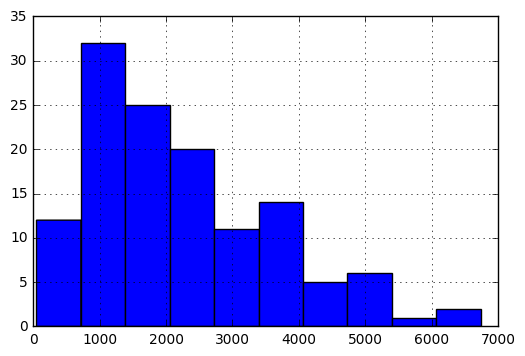

In [95]:
master["MAY-FY16"].hist()

In [96]:
master["%_Appts_Over_30_Complete_1409"].describe()

count    140.000000
mean       2.583643
std        1.735691
min        0.100000
25%        1.487500
50%        2.085000
75%        3.212500
max        9.340000
Name: %_Appts_Over_30_Complete_1409, dtype: float64

In [97]:
master["%_Appts_Over_30_Complete_1409"]

0      1.67
1      1.58
2      1.59
3      1.05
4      1.63
5      5.00
6      1.42
7      1.50
8      0.88
9      1.85
10     2.36
11     1.98
12     4.00
13     0.53
14     3.18
15     0.90
16     0.56
17     1.08
18     4.57
19     2.05
20     0.10
21     6.44
22     0.27
23     1.73
24     1.33
25     2.83
26     2.04
27     0.74
28     2.24
29     0.97
       ... 
110    4.50
111    1.86
112    0.38
113    5.55
114    3.67
115    4.07
116    2.21
117    2.15
118    1.64
119    3.09
120    1.70
121    0.72
122    4.20
123    3.66
124    2.73
125    4.92
126    1.46
127    3.07
128    1.58
129    3.08
130    2.25
131    4.39
132    1.80
133    2.99
134    2.46
135    1.18
136    1.48
137    2.90
138    0.47
139    1.43
Name: %_Appts_Over_30_Complete_1409, dtype: float64

# Looking at vet population 

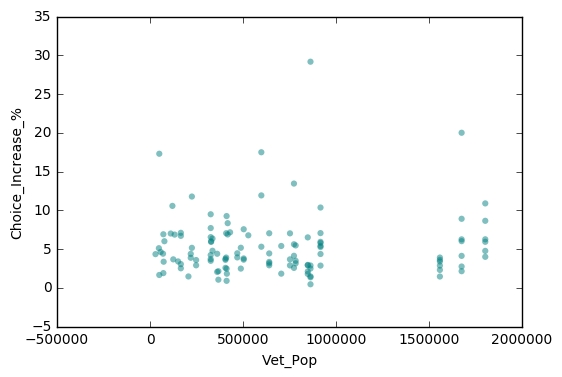

In [98]:
df.plot(kind="scatter",x="Vet_Pop",y="Choice_Increase_%",edgecolor='none',color='teal',alpha=.5)

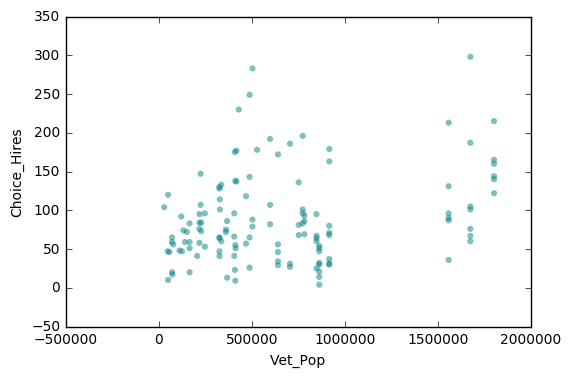

In [99]:
df.plot(kind="scatter",x="Vet_Pop",y="Choice_Hires",edgecolor='none',color='teal',alpha=.5)

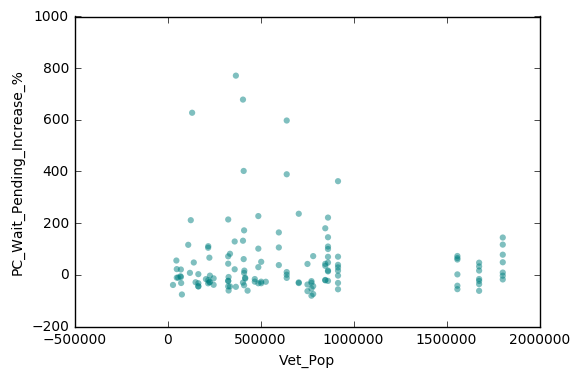

In [100]:
df.plot(kind="scatter",x="Vet_Pop",y='PC_Wait_Pending_Increase_%',edgecolor='none',color='teal',alpha=.5)

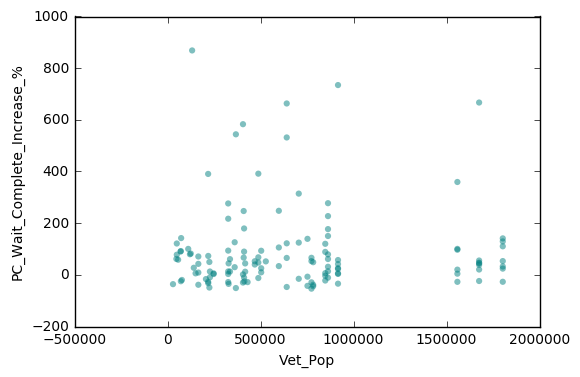

In [101]:
df.plot(kind="scatter",x="Vet_Pop",y='PC_Wait_Complete_Increase_%',edgecolor='none',color='teal',alpha=.5)

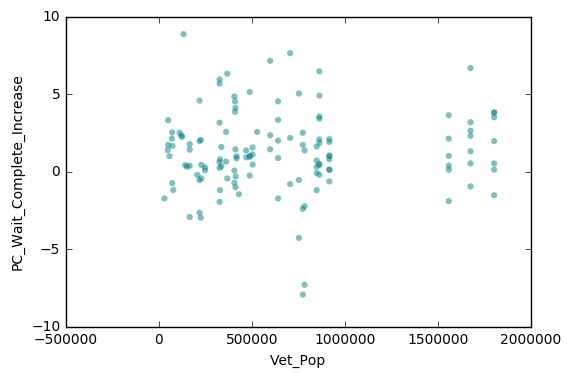

In [102]:
df.plot(kind="scatter",x="Vet_Pop",y='PC_Wait_Complete_Increase',edgecolor='none',color='teal',alpha=.5)

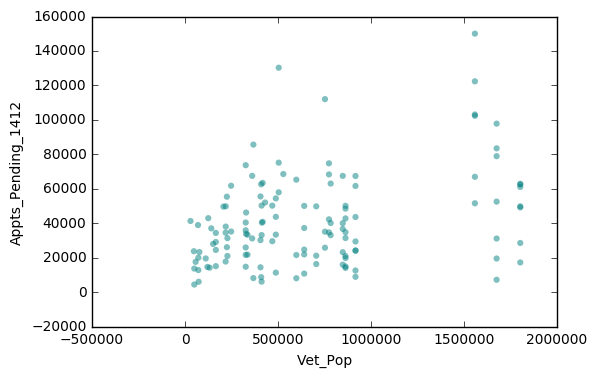

In [103]:
df.plot(kind="scatter",x="Vet_Pop",y='Appts_Pending_1412',edgecolor='none',color='teal',alpha=.5)

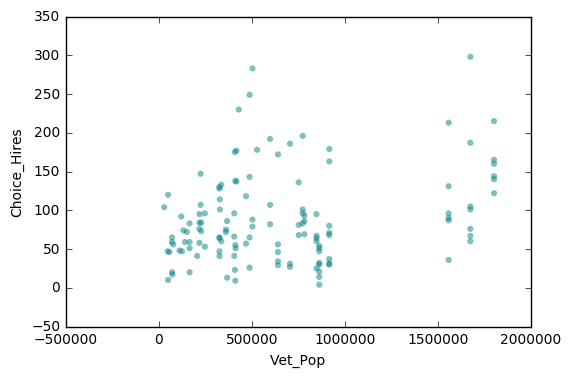

In [104]:
df.plot(kind="scatter",x="Vet_Pop",y='Choice_Hires',edgecolor='none',color='teal',alpha=.5)

In [105]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'for_dups', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'ID',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

# How many VA's have improved between 2014 and 2016

In [106]:
(df[df["Percentage_Point_Wait_Over_30_Increase_Complete"]==0])["State"]

13    NY
Name: State, dtype: object

In [107]:
df[["State_Full",'State']]

,State_Full,State
0,Maine ...,ME
1,Vermont ...,VT
2,Massachusetts,MA
3,Massachusetts,MA
4,New Hampshire ...,NH
5,NaN,CS
6,Rhode Island ...,RI
7,Connecticut ...,CT
8,New York ...,NY
9,New York ...,NY


In [108]:
len(df[df["Percentage_Point_Wait_Over_30_Increase_Complete"]<0])

39

In [109]:
len(df)

140

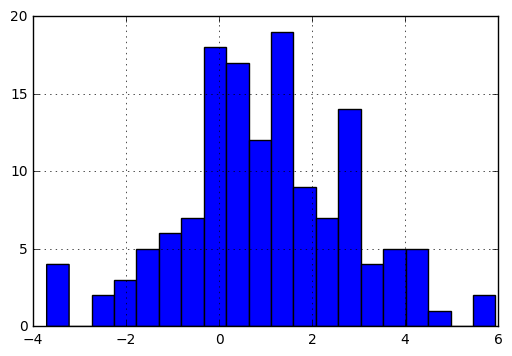

In [110]:
df["Percentage_Point_Wait_Over_30_Increase_Complete"].hist(bins=20)

count    39.000000
mean     -1.129231
std       1.068342
min      -3.710000
25%      -1.525000
50%      -0.930000
75%      -0.275000
max      -0.020000
Name: Percentage_Point_Wait_Over_30_Increase_Complete, dtype: float64

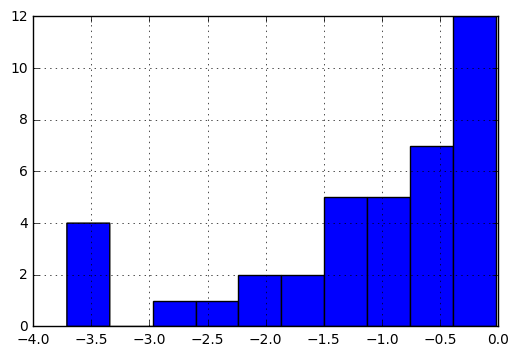

In [111]:
df[df["Percentage_Point_Wait_Over_30_Increase_Complete"]<0]["Percentage_Point_Wait_Over_30_Increase_Complete"].hist()
df[df["Percentage_Point_Wait_Over_30_Increase_Complete"]<0]["Percentage_Point_Wait_Over_30_Increase_Complete"].describe()

count    100.000000
mean       1.869900
std        1.321665
min        0.050000
25%        0.772500
50%        1.500000
75%        2.780000
max        5.940000
Name: Percentage_Point_Wait_Over_30_Increase_Complete, dtype: float64

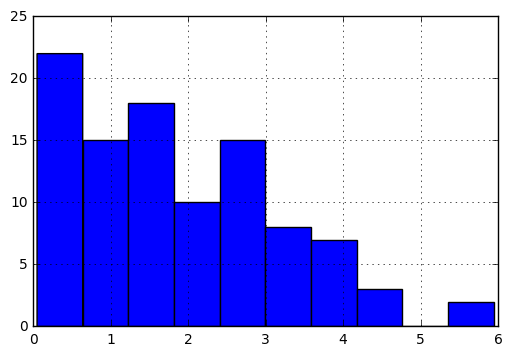

In [112]:
df[df["Percentage_Point_Wait_Over_30_Increase_Complete"]>0]["Percentage_Point_Wait_Over_30_Increase_Complete"].hist()
df[df["Percentage_Point_Wait_Over_30_Increase_Complete"]>0]["Percentage_Point_Wait_Over_30_Increase_Complete"].describe()


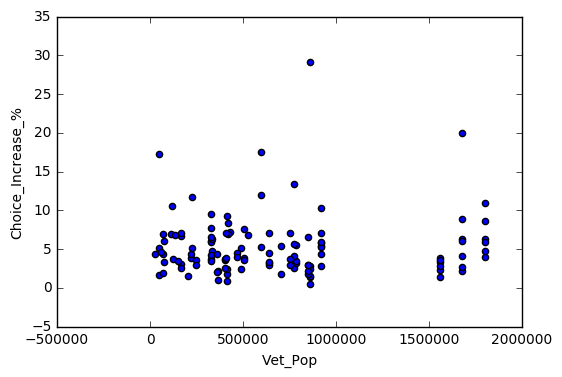

In [113]:
df.plot(kind="scatter",x="Vet_Pop",y="Choice_Increase_%")

# Statement about wait times

In [114]:
#Math
stations_increased_wait = df[df["Percentage_Point_Wait_Over_30_Increase_Complete"] > 0]
stations_decreased_wait = df[df["Percentage_Point_Wait_Over_30_Increase_Complete"] < 0]
past_average_wait = (national_complete["Appts_Complete_Over_30_Days_%_National"].tail(1).item())*100
present_average_wait = (national_complete["Appts_Complete_Over_30_Days_%_National"].head(1).item())*100

#Statement
print "Out of {} VA stations, {} saw an increase in wait times. {} saw a decrease.".format(len(df),
                                                                                             len(stations_increased_wait),
                                                                                            len(stations_decreased_wait))
print "Across the nation, the percent of appointments that took over 30 days to complete went from {} percent"\
" in September 2014 to {} percent in August 2016.".format(past_average_wait,present_average_wait)


Out of 140 VA stations, 100 saw an increase in wait times. 39 saw a decrease.
Across the nation, the percent of appointments that took over 30 days to complete went from 1.61 percent in September 2014 to 3.68 percent in August 2016.


In [115]:
national_complete["Appts_Complete_Over_30_Days_%_National"].head(1).item()

0.0368

In [116]:
national_complete["Appts_Complete_Over_30_Days_%_National"].tail(1).item()

0.0161

In [117]:
national_pending["Appts_Pending_Over_30_Days_%_National"].head(1).item()

0.0733

In [118]:
national_pending["Appts_Pending_Over_30_Days_%_National"].tail(1).item()

0.0601

In [119]:
for index, row in df.iterrows():
    print type(row)

    


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [120]:
df["MAY-FY11"][0]

1293.0

In [121]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
Appts_Pending_1412,42899,23709,8105,85625,19511,22602,38893,49615,31376,14816,...,61038,80701,17514,19971,12773,67476,20957,31302,36985,31130
%_Appts_Over_30_Pending_1412,2.7,2.16,5.17,1.71,2.64,9.26,4.12,2.18,3.16,4.2,...,9.4,9.95,4.48,3.65,5.79,3.1,5.23,5.07,0.82,3.69
PC_Wait_Pending_1412,2.51,3.92,1.12,1.66,2.66,10.54,7.4,2.35,2.33,3.35,...,6.67,6.46,5.39,3.91,4.03,4.57,7.7,6.79,2.24,2.82
SC_Wait_Pending_1412,4.07,3.95,10.53,3.53,4.21,12.5,4.59,4.15,3.64,7.7,...,9.57,13.35,4.42,5.94,8.3,4.13,5.12,5.45,2.19,5.62
MH_Wait_Pending_1412,2.77,0.79,4.41,3.92,5.13,4.18,9.33,3.92,4.29,4.97,...,6.86,4.53,1.71,4.84,3.47,1.19,3.13,2.7,1.16,6.28
for_dups,402,405,518,523,608,631,650,689,528al,528ba,...,664,691,437,438,568,618,636ce,636io,636ne,656
ORGANIZATION,(V01) (402) HCS TOGUS ME,(V01) (405) MROC WHT RIVER JCT VT,(V01) (518) MC BEDFORD MA,(V01) (523) HCS BOSTON MA,(V01) (608) MC MANCHESTER NH,(V01) (631) MC NORTHAMPTON MA,(V01) (650) MC PROVIDENCE RI,(V01) (689) HCS WEST HAVEN CT,(V02) (479) V2HCNALBANY NY,NaN,...,(V22) (664) HCS SAN DIEGO CA,(V22) (691) HCS W/LOS ANGELES CA,(V23) (437) HCS FARGO ND,(V23) (438) HCS SIOUX FALLS SD,(V23) (568) HCS FORT MEADE SD,(V23) (618) HCS MINNEAPOLIS MN,NaN,NaN,NaN,(V23) (656) HCS ST CLOUD MN
MAY-FY11,1293,852,1313,4022,663,639,1215,2477,22,NaN,...,2775,4891,893,898,1093,3461,NaN,NaN,NaN,1487
MAY-FY12,1272,853,1265,4011,683,726,1262,2541,48,NaN,...,2815,4868,882,857,1036,3421,NaN,NaN,NaN,1483
MAY-FY13,1248,881,1245,4041,691,767,1279,2623,55,NaN,...,2991,4844,934,898,1043,3529,NaN,NaN,NaN,1551


In [122]:
test = pd.read_csv("Data/test.csv")
test

,test,test1,test2,test3,test4,test5
0,cat,cat,cat,cat,cat,cat
1,dog,dog,dog,dog,dog,dog
2,cat,dog,NaN,NaN,NaN,NaN
3,dog,cat,dog,cat,NaN,NaN


In [123]:
test_transposed = test.transpose()#.drop_duplicates()

In [124]:
test_transposed

,0,1,2,3
test,cat,dog,cat,dog
test1,cat,dog,dog,cat
test2,cat,dog,NaN,dog
test3,cat,dog,NaN,cat
test4,cat,dog,NaN,NaN
test5,cat,dog,NaN,NaN


In [125]:
test_transposed.drop_duplicates(keep="first")

,0,1,2,3
test,cat,dog,cat,dog
test1,cat,dog,dog,cat
test2,cat,dog,NaN,dog
test3,cat,dog,NaN,cat
test4,cat,dog,NaN,NaN


In [126]:
test.drop_duplicates()

,test,test1,test2,test3,test4,test5
0,cat,cat,cat,cat,cat,cat
1,dog,dog,dog,dog,dog,dog
2,cat,dog,NaN,NaN,NaN,NaN
3,dog,cat,dog,cat,NaN,NaN


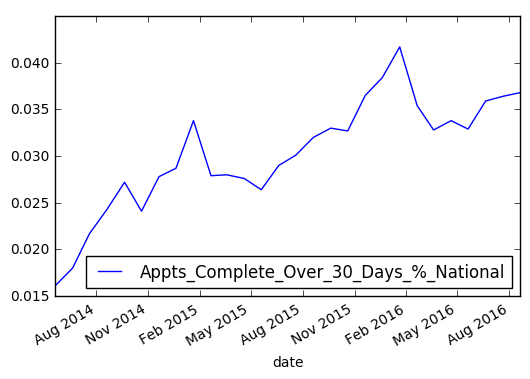

In [127]:
national_complete[["date","Appts_Complete_Over_30_Days_%_National"]].plot(kind="line", x="date")

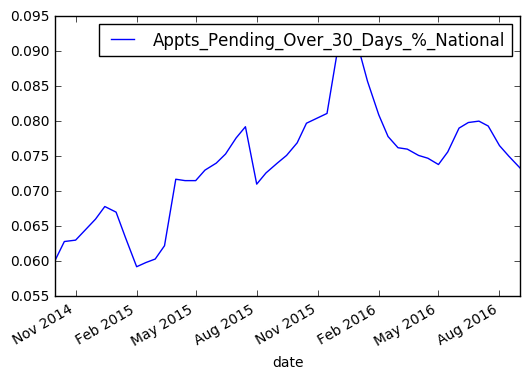

In [128]:
national_pending[["date","Appts_Pending_Over_30_Days_%_National"]].plot(kind="line", x="date")

In [129]:
national_complete

,Complete_Time,Appts_Complete_National,Appts_Complete_Over_30_Days_%_National,PC_Wait_Complete_National,SC_Wait_Complete_National,MH_Wait_Complete_National,date
0,National: 8/2016,5219984,0.0368,4.71,6.68,2.75,2016-08-20
1,National: 7/2016,4438995,0.0364,4.72,6.60,2.77,2016-07-20
2,National: 6/2016,4989814,0.0359,4.66,6.45,2.76,2016-06-20
3,National: 5/2016,4877166,0.0329,4.57,6.16,2.51,2016-05-20
4,National: 4/2016,4931526,0.0338,4.68,6.19,2.43,2016-04-20
5,National: 3/2016,5353597,0.0328,4.66,6.13,2.64,2016-03-20
6,National: 2/2016,4744626,0.0354,4.92,6.44,3.03,2016-02-20
7,National: 1/2016,4497268,0.0417,5.20,6.90,3.29,2016-01-20
8,National: 12/2015,4672667,0.0384,4.87,6.44,3.03,2015-12-20
9,National: 11/2015,4388187,0.0365,4.57,6.28,3.03,2015-11-20


# Identify Stations with bad wait times to start, bad since and few choice hires

In [130]:
df_not_null = df[df["Choice_Increase_%"].notnull()]

In [131]:
# Filtering for stations with more than the mean wait time
interest = df_not_null[df_not_null["PC_Wait_Complete_1409"] >df_not_null["PC_Wait_Complete_1409"].mean()]
# Filtering for stations with August 2016 wait time more than the mean
interest = interest[interest["PC_Wait_Complete_1608"] > df_not_null["PC_Wait_Complete_1608"].mean()]
# Filtering for stations with choice increase less than .25 quantile
interest = interest[interest["Choice_Increase_%"] < df_not_null["Choice_Increase_%"].mean()]
# Filtering for stations with longer wait times in 2016 than 2014 
interest = interest[interest["PC_Wait_Complete_1608"]>interest["PC_Wait_Complete_1409"]]
interest = interest[interest['Staff_14_To_16_Increase_%']<interest['Staff_14_To_16_Increase_%'].mean()]



len(interest)

6

In [132]:
df_not_null["Choice_Increase_%"].quantile(q=.25)

2.8956530766249999

In [133]:
interest[["Location","PC_Wait_Complete_1608","PC_Wait_Complete_1409","Choice_Increase_%"]].to_csv("Data/example_stations.csv")
interest[["Location","PC_Wait_Complete_1608","PC_Wait_Complete_1409","Choice_Increase_%",'Staff_14_To_16_Increase_%']]

,Location,PC_Wait_Complete_1608,PC_Wait_Complete_1409,Choice_Increase_%,Staff_14_To_16_Increase_%
23,"(V04) (562) Erie, PA",5.74,3.65,4.354136,0.577201
60,"(V10) (538) Chillicothe, OH",5.09,4.78,1.784440,2.027972
94,"(V16) (667) Shreveport, LA",5.27,4.66,4.221636,-4.192440
106,(V19) (436) Montana HCS,6.79,5.57,3.351955,-2.789171
114,"(V20) (648) Portland, OR",7.53,7.29,3.474078,1.240433
131,(V22) (691) Greater Los Angeles HCS,5.75,4.64,2.142432,0.962672


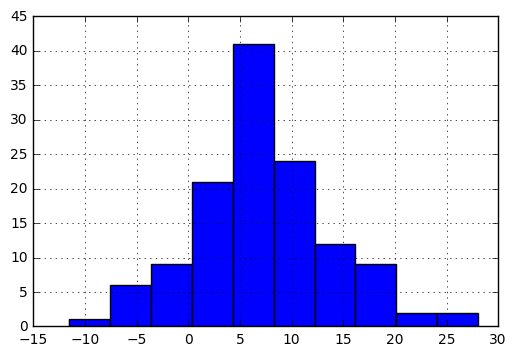

In [134]:
df_not_null['Staff_14_To_16_Increase_%'].hist()

In [135]:
df_not_null = df[df["Choice_Increase_%"].notnull()]

In [136]:
df_not_null["Choice_Increase_%"].describe()

count    127.000000
mean       5.200187
std        3.875663
min        0.141176
25%        2.895653
50%        4.354136
75%        6.423497
max       29.166667
Name: Choice_Increase_%, dtype: float64

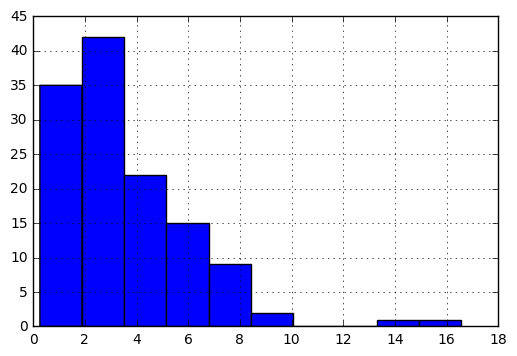

In [137]:
df_not_null["PC_Wait_Complete_1409"].hist()

## Focusing on wait times

In [138]:
# Filtering for stations with more than the mean wait time
interest = df_not_null[df_not_null["PC_Wait_Complete_1409"] >df_not_null["PC_Wait_Complete_1409"].quantile(.75)]
# Filtering for stations with August 2016 wait time more than the mean
interest = interest[interest["PC_Wait_Complete_1608"] > df_not_null["PC_Wait_Complete_1608"].quantile(.75)]
# Filtering for stations with choice increase less than .25 quantile
interest = interest[interest["Choice_Increase_%"] < df_not_null["Choice_Increase_%"].mean()]
# Filtering for stations with longer wait times in 2016 than 2014 
interest = interest[interest["PC_Wait_Complete_1608"]>interest["PC_Wait_Complete_1409"]]

In [139]:
len(interest)

3

In [140]:
interest

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,qualitative_size,State_Full,Vet_Pop,PC_Wait_Pending_1412_ceil,PC_Wait_Pending_1610_ceil,PC_Wait_Complete_1409_ceil,PC_Wait_Complete_1608_ceil,PC_Wait_Pending_Increase_%_ceil,Choice_Increase_%_ceil,MAY-FY14_Ceil
97,78890,8.64,11.98,8.25,6.64,674,(V17) (674) HCS TEMPLE TX,3529.0,3345.0,3488.0,...,large,Texas ...,1675262.0,12.0,11.0,7.0,10.0,-16.0,275.0,3700.0
106,18288,9.24,15.45,4.56,4.23,436,(V19) (436) HCS FT HARRISON MT,1031.0,1034.0,1133.0,...,average,NaN,NaN,16.0,16.0,6.0,7.0,-0.0,336.0,1300.0
114,73666,6.91,12.99,8.81,1.87,648,(V20) (648) MC PORTLAND OR,3343.0,3463.0,3566.0,...,large,Oregon ...,326338.0,13.0,10.0,8.0,8.0,-23.0,348.0,3800.0


In [141]:
interest[["Location","PC_Wait_Complete_1608","PC_Wait_Complete_1409","Choice_Increase_%"]]

,Location,PC_Wait_Complete_1608,PC_Wait_Complete_1409,Choice_Increase_%
97,"(V17) (674) Temple, TX",9.95,6.77,2.740098
106,(V19) (436) Montana HCS,6.79,5.57,3.351955
114,"(V20) (648) Portland, OR",7.53,7.29,3.474078


In [142]:
interest

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,qualitative_size,State_Full,Vet_Pop,PC_Wait_Pending_1412_ceil,PC_Wait_Pending_1610_ceil,PC_Wait_Complete_1409_ceil,PC_Wait_Complete_1608_ceil,PC_Wait_Pending_Increase_%_ceil,Choice_Increase_%_ceil,MAY-FY14_Ceil
97,78890,8.64,11.98,8.25,6.64,674,(V17) (674) HCS TEMPLE TX,3529.0,3345.0,3488.0,...,large,Texas ...,1675262.0,12.0,11.0,7.0,10.0,-16.0,275.0,3700.0
106,18288,9.24,15.45,4.56,4.23,436,(V19) (436) HCS FT HARRISON MT,1031.0,1034.0,1133.0,...,average,NaN,NaN,16.0,16.0,6.0,7.0,-0.0,336.0,1300.0
114,73666,6.91,12.99,8.81,1.87,648,(V20) (648) MC PORTLAND OR,3343.0,3463.0,3566.0,...,large,Oregon ...,326338.0,13.0,10.0,8.0,8.0,-23.0,348.0,3800.0


In [143]:
df_not_null["Choice_Increase_%"].mean()

5.2001865463318735

In [144]:
df_not_null["Choice_Increase_%"].median()

4.35413642961

In [145]:
df

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,qualitative_size,State_Full,Vet_Pop,PC_Wait_Pending_1412_ceil,PC_Wait_Pending_1610_ceil,PC_Wait_Complete_1409_ceil,PC_Wait_Complete_1608_ceil,PC_Wait_Pending_Increase_%_ceil,Choice_Increase_%_ceil,MAY-FY14_Ceil
0,42899,2.70,2.51,4.07,2.77,402,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,average,Maine ...,125078.0,3.0,8.0,3.0,5.0,212.0,367.0,1300.0
1,23709,2.16,3.92,3.95,0.79,405,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,average,Vermont ...,47664.0,4.0,7.0,3.0,4.0,56.0,511.0,1000.0
2,8105,5.17,1.12,10.53,4.41,518,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,average,Massachusetts,367531.0,2.0,1.0,1.0,1.0,-46.0,104.0,1300.0
3,85625,1.71,1.66,3.53,3.92,523,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,large,Massachusetts,367531.0,2.0,15.0,2.0,8.0,772.0,214.0,4100.0
4,19511,2.64,2.66,4.21,5.13,608,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,small,New Hampshire ...,111389.0,3.0,6.0,3.0,5.0,117.0,700.0,700.0
5,22602,9.26,10.54,12.50,4.18,631,(V01) (631) MC NORTHAMPTON MA,639.0,726.0,767.0,...,small,NaN,NaN,11.0,8.0,7.0,6.0,-25.0,453.0,800.0
6,38893,4.12,7.40,4.59,9.33,650,(V01) (650) MC PROVIDENCE RI,1215.0,1262.0,1279.0,...,average,Rhode Island ...,69862.0,8.0,7.0,3.0,5.0,-5.0,440.0,1400.0
7,49615,2.18,2.35,4.15,3.92,689,(V01) (689) HCS WEST HAVEN CT,2477.0,2541.0,2623.0,...,average,Connecticut ...,206549.0,3.0,2.0,2.0,2.0,-16.0,146.0,2900.0
8,31376,3.16,2.33,3.64,4.29,528al,(V02) (479) V2HCNALBANY NY,22.0,48.0,55.0,...,small,New York ...,862805.0,3.0,6.0,2.0,5.0,146.0,2917.0,100.0
9,14816,4.20,3.35,7.70,4.97,528ba,NaN,NaN,NaN,NaN,...,average,New York ...,862805.0,4.0,8.0,4.0,4.0,110.0,NaN,NaN
